## 라이브러리 & 패키지 & data load

In [1]:
# !pip install geopandas
# !pip install descartes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import geopandas as gpd
from shapely.geometry import Point
import datetime
import os

In [4]:
click = pd.read_csv('../Data_file/click_stream_new.csv')
transaction = pd.read_csv('../Data_file/transaction_new.csv')
product = pd.read_csv('../Data_file/product.csv', on_bad_lines='skip')
customer = pd.read_csv('../Data_file/customer.csv')

## EDA

### 1. clcik_stream

#### 1-1. data 확인

In [4]:
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   event_id         object 
 4   traffic_source   object 
 5   product_id       float64
 6   quantity         float64
 7   item_price       float64
 8   payment_status   object 
 9   search_keywords  object 
 10  promo_code       object 
 11  promo_amount     float64
dtypes: float64(4), object(8)
memory usage: 1.1+ GB


In [124]:
click = click.sort_values('session_id')

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,event_year,event_hour,hour,day_of_week,is_weekend
1405115,00005746-17ec-449c-9c5c-699a3ea9304a,SCROLL,2022-03-08 23:19:33.510057+00:00,b2ef1e62-fa4b-4200-a9d2-6267798c5a91,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,23,23,1,False
1405141,00005746-17ec-449c-9c5c-699a3ea9304a,HOMEPAGE,2022-03-08 23:21:18.510057+00:00,c9515260-768d-4957-8a45-59fdf8e3b44b,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,23,23,1,False
1405140,00005746-17ec-449c-9c5c-699a3ea9304a,HOMEPAGE,2022-03-08 23:21:13.510057+00:00,caf9d9ee-54a0-4c8b-bf9b-13186d7bf783,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,23,23,1,False
1405139,00005746-17ec-449c-9c5c-699a3ea9304a,SEARCH,2022-03-08 23:21:09.510057+00:00,af63c0ed-42af-4b98-8343-ef6b656a9385,MOBILE,NaN,NaN,NaN,NaN,T-Shirt,NaN,NaN,2022,23,23,1,False
1405138,00005746-17ec-449c-9c5c-699a3ea9304a,SCROLL,2022-03-08 23:21:06.510057+00:00,b3335db1-5162-4144-b019-209028e7a14b,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,23,23,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234975,fffff7cf-2a18-4303-9c12-aa836ae3b543,CLICK,2021-02-25 13:55:10.937313+00:00,eaf16c5b-fdc9-43eb-8001-00fa9943ae1f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,13,13,3,False
5234976,fffff7cf-2a18-4303-9c12-aa836ae3b543,ADD_TO_CART,2021-02-25 17:14:37.937313+00:00,1b18137e-c9c3-49e4-acf7-d1d8ab43f678,MOBILE,49545.0,1.0,231356.0,NaN,NaN,NaN,NaN,2021,17,17,3,False
5234977,fffff7cf-2a18-4303-9c12-aa836ae3b543,ITEM_DETAIL,2021-02-25 20:37:22.937313+00:00,830f67de-6cb8-449e-b3df-0b4450573b8f,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,20,20,3,False
5234966,fffff7cf-2a18-4303-9c12-aa836ae3b543,HOMEPAGE,2021-02-24 17:40:30.937313+00:00,17a38d8a-9504-4f1e-aaf9-b46488f301d2,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,17,17,2,False


session_id: 세션 아이디 </br>
event_name: 이벤트(유저의 동작)의 이름 </br>
event_time: 이벤트(유저의 동작)가 일어난 시간 </br>
event_id: 이벤트 아이디 </br>
traffic_source: 접속 환경(모바일/웹) </br>
product_id: 제품 아이디 </br>
quantiy: 제품 개수 </br>
item_price: 제품 가격 </br>
payment_status: 결제 상태 </br>
search_keywords: 검색 키워드 </br>
promo_code: 프로모션 코드 </br>
promo_amount: 프로모션 가격 </br>

In [6]:
# event_time을 datetime 형태로 변환
click['event_time'] = pd.to_datetime(click['event_time'])

# 연도와 시간 컬럼 생성
click['event_year'] = click['event_time'].dt.year
click['event_hour'] = click['event_time'].dt.hour

# 기간 설정: 2020.08.01 ~ 2022.07.31
start_date = pd.Timestamp(2020, 8, 1, tz='UTC')
end_date = pd.Timestamp(2022, 7, 31, tz='UTC')

# 해당 기간에 해당하는 데이터만 추출
click = click[(click['event_time'] >= start_date) & (click['event_time'] <= end_date)]
click.shape

(7995246, 14)

In [7]:
# 데이터 확인
for i in click.columns:

    print(f'{i} nunique : {click[i].nunique()}', '\n')
    print(f'{i} unique : {click[i].unique()}', '\n')
    print(f'{i} value_count : {click[i].value_counts()}', '\n')
    print('--------------------', '\n')

session_id nunique : 550397 

session_id unique : ['50761ff1-f1e9-4680-a626-c4282d70dd6f'
 'aacf73d8-761e-4272-b772-def0cba2904d'
 'f086d0aa-a5df-49db-973e-eda793240226' ...
 'f5c4bbe0-f977-45bb-af23-6ab524df7777'
 'ad1063b0-a6e5-40a9-aed6-d1b45741e571'
 '64585e37-3fe7-48d7-b79b-ebcb70230eb2'] 

session_id value_count : session_id
65383bfb-5535-445f-ab52-aec4658eb0bd    650
d46877e2-9e20-4277-8698-647dee913a14    539
12489f38-0fc1-4b80-9fe4-b267c4413ae7    539
230b1fd1-595a-4d28-a75f-23ff686df302    483
756d0b19-5870-4bb8-aa74-611f85f9804f    477
                                       ... 
b7c1e2ee-9834-4f6b-85ca-2cd40cce7f78      1
1cd11270-5c95-4bcd-a9bd-4d3359788bc8      1
cd1b0c57-b9d0-4cce-a8cc-7b911eaca6bb      1
2d5257a8-5640-4e0d-8ce0-1ef2de13dc35      1
9164cda7-31e1-49fb-ac3f-7b5a64e18f48      1
Name: count, Length: 550397, dtype: int64 

-------------------- 

event_name nunique : 9 

event_name unique : ['HOMEPAGE' 'ADD_TO_CART' 'ADD_PROMO' 'BOOKING' 'PROMO_PAGE' 'ITEM_DETA

#### 1-2. 유저 행동(event) 관련 분석

##### 1-2-1. 전체 이벤트 빈도 확인

In [8]:
# 전체 이벤트 확인
event_count = click['event_name'].value_counts()
event_count

event_name
CLICK          1584462
HOMEPAGE       1553359
ADD_TO_CART    1136832
SCROLL         1063150
ITEM_DETAIL     820236
SEARCH          752464
BOOKING         531232
PROMO_PAGE      369538
ADD_PROMO       183973
Name: count, dtype: int64

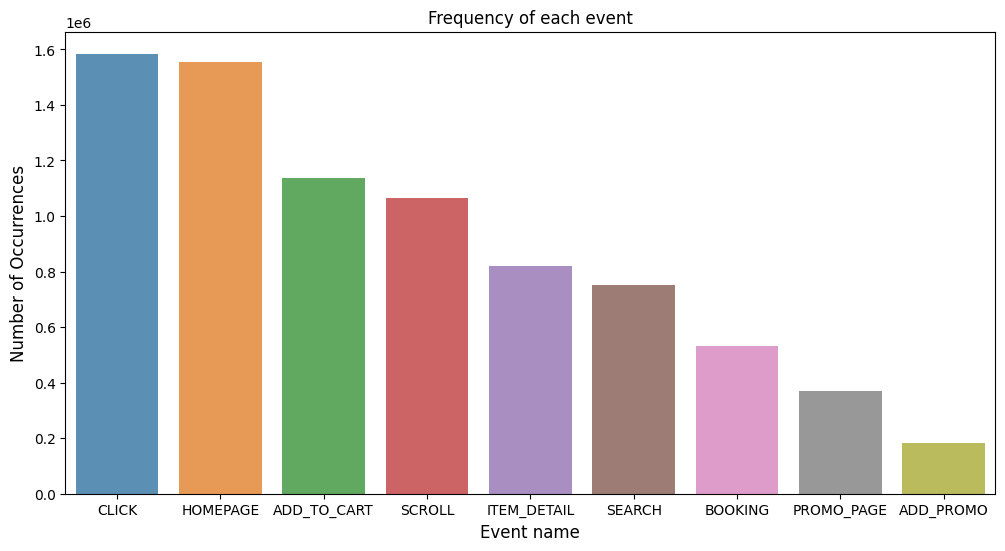

In [9]:
# 전체 이벤트 내림차순으로 막대 그래프 시각화
plt.figure(figsize=(12,6))
sns.barplot(x=event_count.index, y=event_count.values, alpha=0.8)
plt.title('Frequency of each event')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Event name', fontsize=12)
plt.show()

In [10]:
# 세션별 마지막 이벤트 확인

click['event_time'] = pd.to_datetime(click['event_time'])
click = click.sort_values('event_time')

last_event_session = click.groupby('session_id')['event_name'].last()
last_event_session.value_counts()

event_name
BOOKING        454137
HOMEPAGE        29398
CLICK           18922
SCROLL          17010
ITEM_DETAIL     13049
SEARCH           9400
PROMO_PAGE       6094
ADD_TO_CART      2379
ADD_PROMO           8
Name: count, dtype: int64

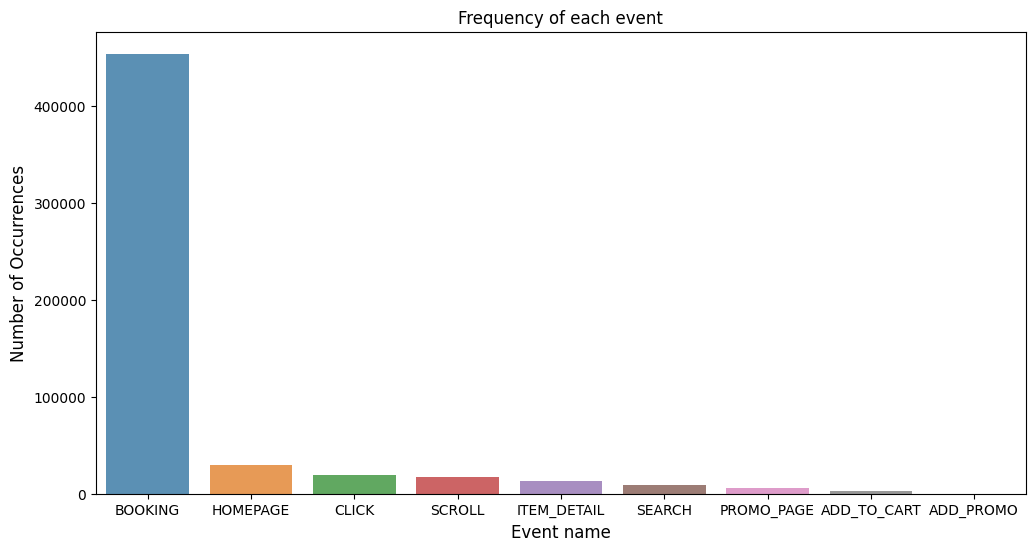

In [11]:
# # 세션별 마지막 이벤트 내림차순으로 막대그래프 시각화

last_event_count = last_event_session.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=last_event_count.index, y=last_event_count.values, alpha=0.8)
plt.title('Frequency of each event')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Event name', fontsize=12)
plt.show()

- 전체 이벤트에 대한 빈도수를 확인해본 결과</br>
  'CLICK' 이벤트가 가장 많은 빈도를 차지, 'HOMEPAGE'와 'ADD_TO_CART'가 그 다음, 'ADD_PROMO'는 가장 낮음</br>
  유저들이 대체로 웹사이트에서 상품을 클릭하고, 홈페이지를 방문하며, 장바구니에 물건을 추가하는 행동을 가장 많이 하고 있음을 의미. </br>
  반면, 프로모션 코드를 추가하는 행동은 상대적으로 적게 이루어지고 있음</br>
  
- 세션별 마지막 이벤트를 확인한 결과
  'BOOKING' 이벤트가 압도적으로 많음. </br>
  대부분의 유저들이 세션을 마무리하며 예약 또는 구매를 하고 있다는 것을 의미. </br>
  이는 웹사이트가 유저들에게 구매를 완료하도록 잘 유도하고 있다는 긍정적인 지표. </br>

##### 1-2-2. 시간별 이벤트 빈도 분석

hour
0     341705
1     336673
2     331435
3     326346
4     326245
5     324732
6     322280
7     323412
8     322413
9     322830
10    323312
11    327368
12    327610
13    328318
14    332325
15    334061
16    336516
17    337181
18    340347
19    342985
20    347433
21    347623
22    347167
23    344929
Name: event_name, dtype: int64


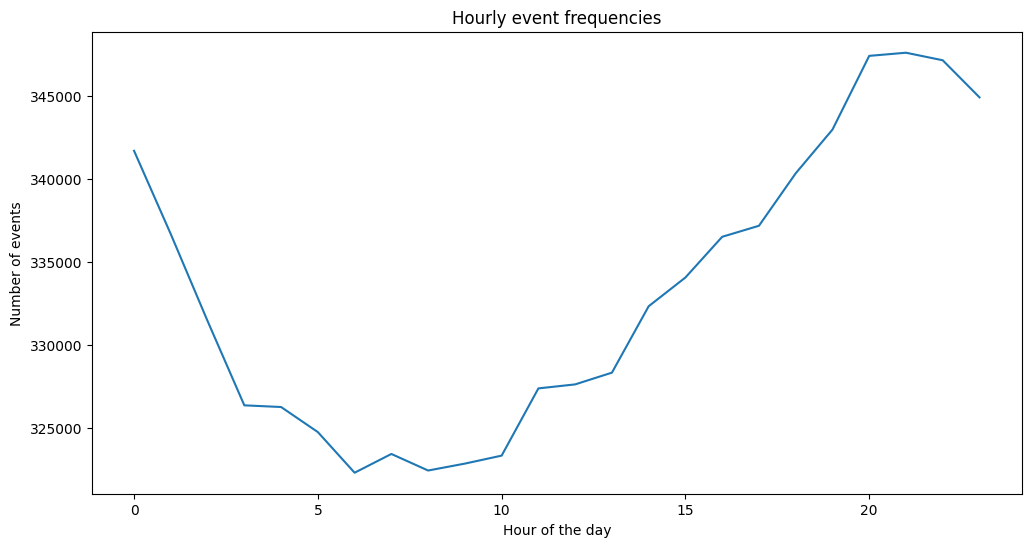

In [12]:
# 1시간대(hour) 이벤트 빈도 분석
click['event_time'] = pd.to_datetime(click['event_time'])
click['hour'] = click['event_time'].dt.hour

hourly_events = click.groupby('hour')['event_name'].count()
print(hourly_events)

plt.figure(figsize=(12,6))
sns.lineplot(x=hourly_events.index, y=hourly_events.values)
plt.title('Hourly event frequencies')
plt.xlabel('Hour of the day')
plt.ylabel('Number of events')
plt.show()

In [13]:
# 최대 빈도수와 최소 빈도수의 비율 비교
total_events = click['event_name'].count()
hourly_percentages = (hourly_events / total_events) * 100

min_hourly_percentage = hourly_percentages.min()
max_hourly_percentage = hourly_percentages.max()

print("The percentage of events at the least active hour: ", min_hourly_percentage)
print("The percentage of events at the most active hour: ", max_hourly_percentage)


The percentage of events at the least active hour:  4.030895359567423
The percentage of events at the most active hour:  4.347871222473955


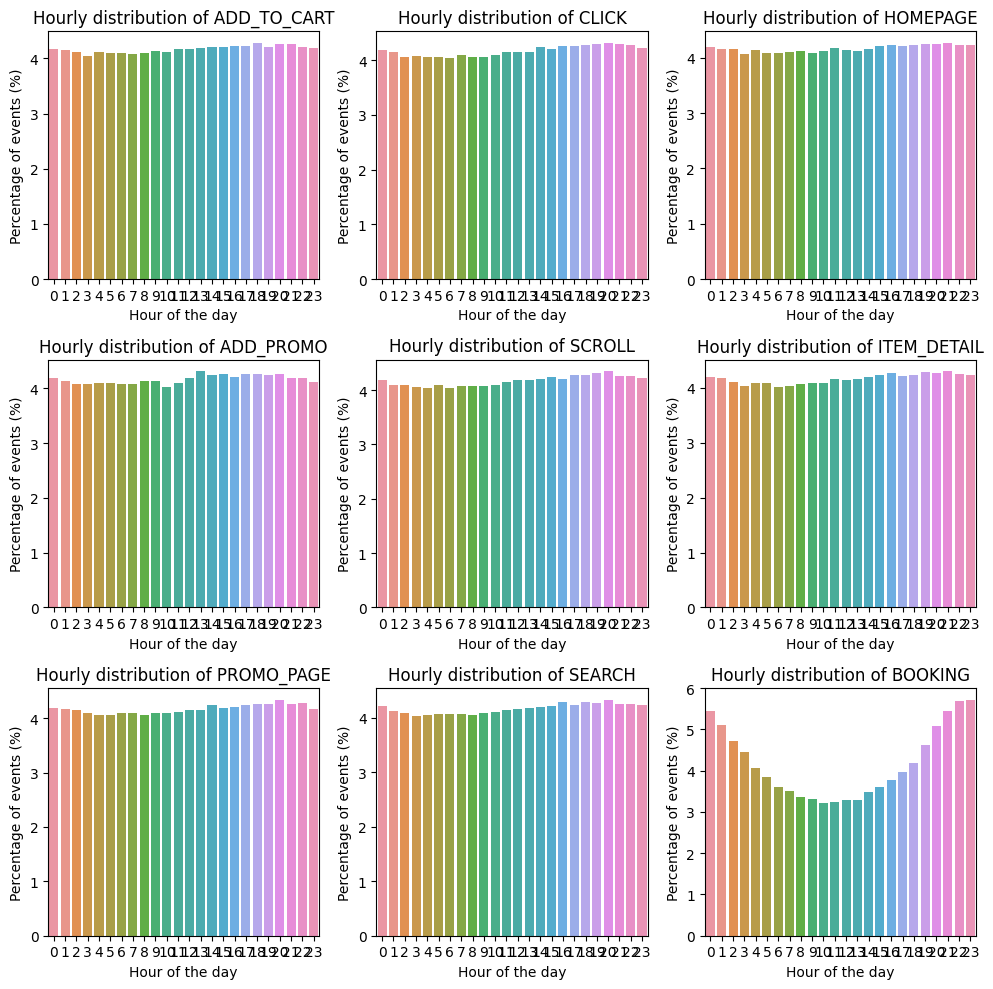

In [14]:

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# 모든 유니크한 이벤트에 대해 반복
for idx, event in enumerate(click['event_name'].unique()):
    # 해당 이벤트만 추출
    event_data = click[click['event_name'] == event]
    
    # 시간별 이벤트 빈도 계산
    event_hourly = event_data.groupby('hour').size()
    
    # 빈도를 백분율로 변환
    event_hourly_percent = (event_hourly / event_hourly.sum()) * 100
    
    # 현재 subplot 좌표 계산
    row = idx // 3
    col = idx % 3
    
    # 백분율로 변환된 빈도를 해당 subplot에 바 차트로 그림
    sns.barplot(x=event_hourly_percent.index, y=event_hourly_percent.values, ax=axes[row, col])
    axes[row, col].set_title(f'Hourly distribution of {event}')
    axes[row, col].set_xlabel('Hour of the day')
    axes[row, col].set_ylabel('Percentage of events (%)')

# 빈 subplot 숨김 (만약 이벤트 유니크 수가 9가 아니라면 필요할 수 있음)
for idx in range(len(click['event_name'].unique()), 9):
    row = idx // 3
    col = idx % 3
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()






day_of_week
0    1157333
1    1103310
2    1088163
3    1095408
4    1110100
5    1199518
6    1241414
Name: event_name, dtype: int64


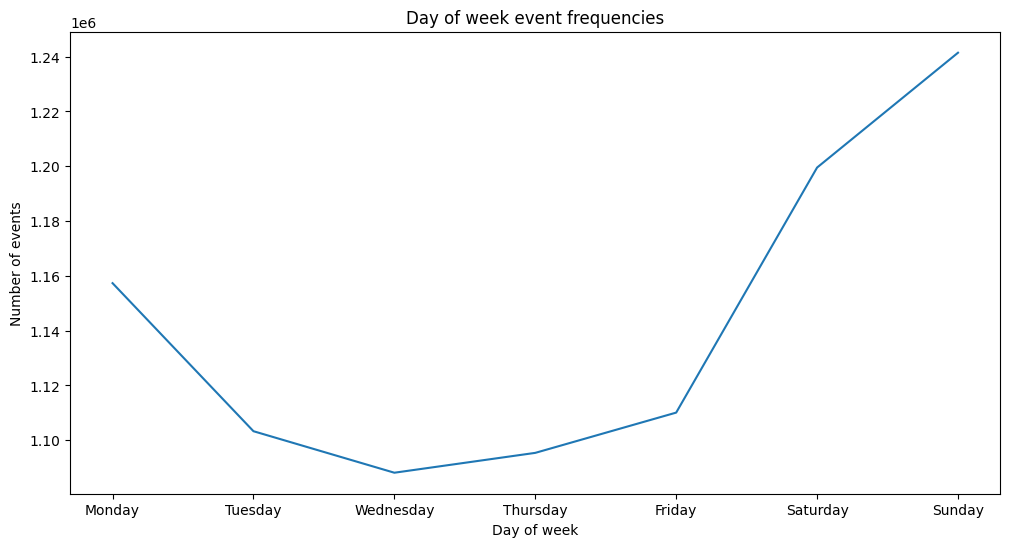

In [15]:
# 요일별 이벤트 빈도 분석
click['day_of_week'] = click['event_time'].dt.dayofweek

dayofweek_events = click.groupby('day_of_week')['event_name'].count()

print(dayofweek_events)

plt.figure(figsize=(12,6))
sns.lineplot(x=dayofweek_events.index, y=dayofweek_events.values)
plt.title('Day of week event frequencies')
plt.xlabel('Day of week')
plt.ylabel('Number of events')
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()


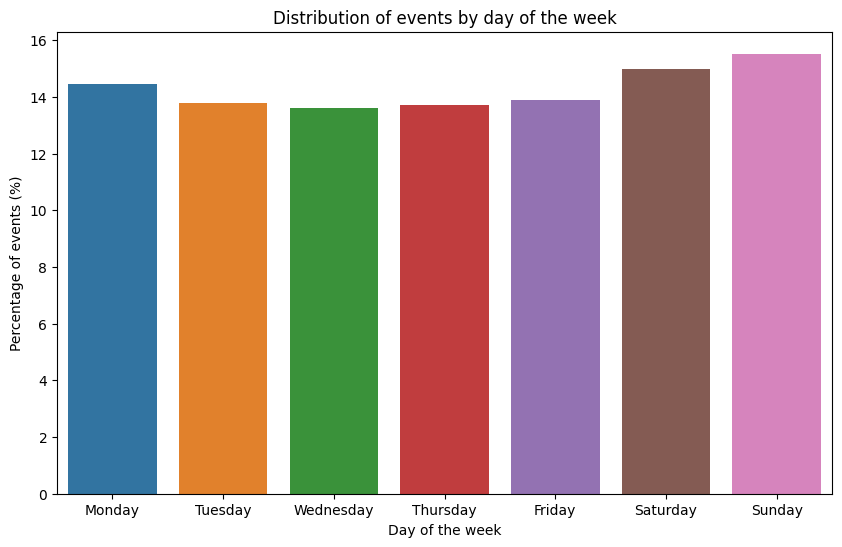

In [16]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayofweek_percent = (dayofweek_events / dayofweek_events.sum()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week, y=dayofweek_percent.values)
plt.title('Distribution of events by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Percentage of events (%)')
plt.show()


is_weekend
False    5554314
True     2440932
Name: event_name, dtype: int64


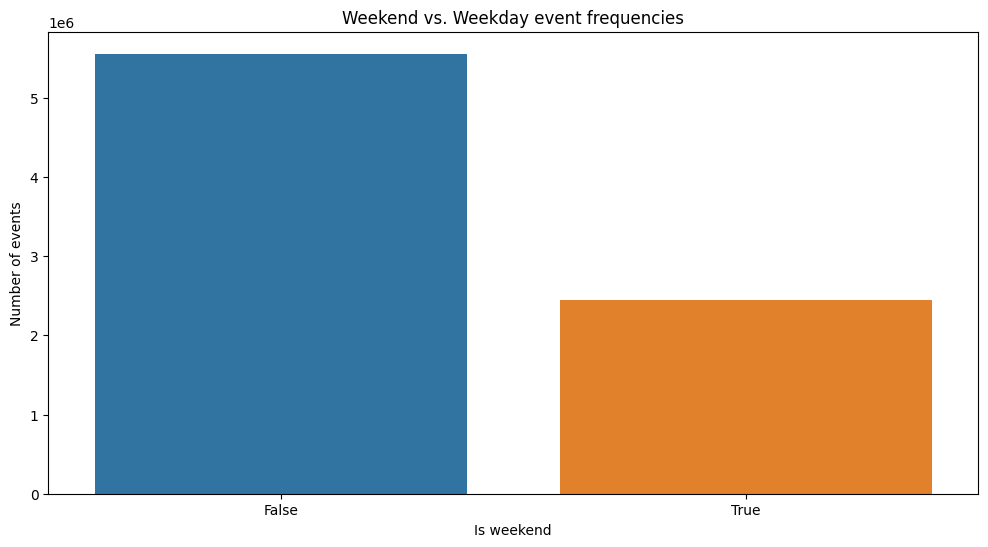

In [18]:
# 주말/평일 별 이벤트 빈도
click['is_weekend'] = click['day_of_week'].apply(lambda x: True if x>=5 else False)

weekend_events = click.groupby('is_weekend')['event_name'].count()

print(weekend_events)

plt.figure(figsize=(12,6))
sns.barplot(x=weekend_events.index, y=weekend_events.values)
plt.title('Weekend vs. Weekday event frequencies')
plt.xlabel('Is weekend')
plt.ylabel('Number of events')
plt.show()


- 1시간대(hour) 이벤트 빈도 : </br>
  오후부터 이벤트 수가 증가하고 주로 저녁 시간대(18~24)에 많이 발생, 새벽부터 감소하고 아침에 제일 낮음.</br>
  그러나 비율을 확인해봤을 때 최대 활동 시간대와 최소 활동 시간대 사이의 비율 차이가 대략 0.23% 정도로, 이는 상대적으로 작은 차이.</br>
  유저들이 시간에 관계없이 비슷한 비율로 행동한다고 추측할 수 있음. 다만 모든 활동에 대한 수치이므로 이벤트별로 확인해야 함.</br>
  각 이벤트별로 시간대에 따른 비율을 확인한 결과 'BOOKING'의 경우 오전 보다는 오후에 비율이 높지만 1%밖에 차이가 없고 </br>
  모든 이벤트가 비슷한 비율을 보여주므로 유저들의 활동패턴이 일정하게 분포되어 있음.</br>

- 요일별, 주말/평일 이벤트 분석 :</br>
  시간대 분석과 비슷한 경향을 보임. 요일 또는 주말/평일 여부는 유저 행동에 영향을 주지 않는다고 볼 수 있음.
  

  

  traffic_source  proportion
0         MOBILE   89.999207
1            WEB   10.000793


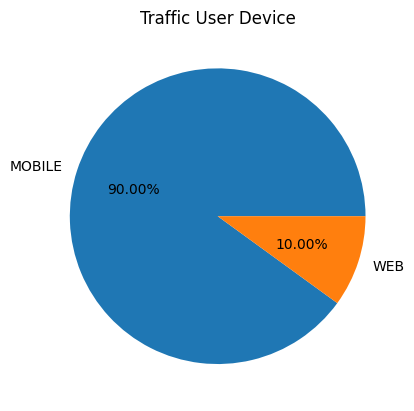

In [20]:
# 접속 환경(기기) 비율 확인
device = click[['traffic_source']].value_counts(normalize=True) * 100
df_device = pd.DataFrame(device)
df_device.reset_index(inplace=True)
print(df_device)

plt.pie(x = df_device['proportion'], labels = df_device['traffic_source'], autopct='%.2f%%')
plt.title('Traffic User Device')
plt.show()

### 2. Customer

#### 2-1. 데이터 확인

In [21]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [22]:
customer.describe()
customer.isnull().sum()

customer_id           0
first_name            0
last_name             0
username              0
email                 0
gender                0
birthdate             0
device_type           0
device_id             0
device_version        0
home_location_lat     0
home_location_long    0
home_location         0
home_country          0
first_join_date       0
dtype: int64

#### 2-2. 데이터 분석

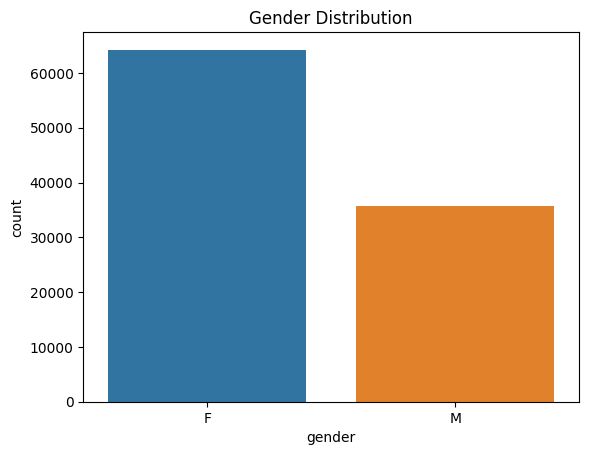

In [23]:
# 고객의 성별 수 확인
sns.countplot(x='gender', data=customer)
plt.title('Gender Distribution')
plt.show()

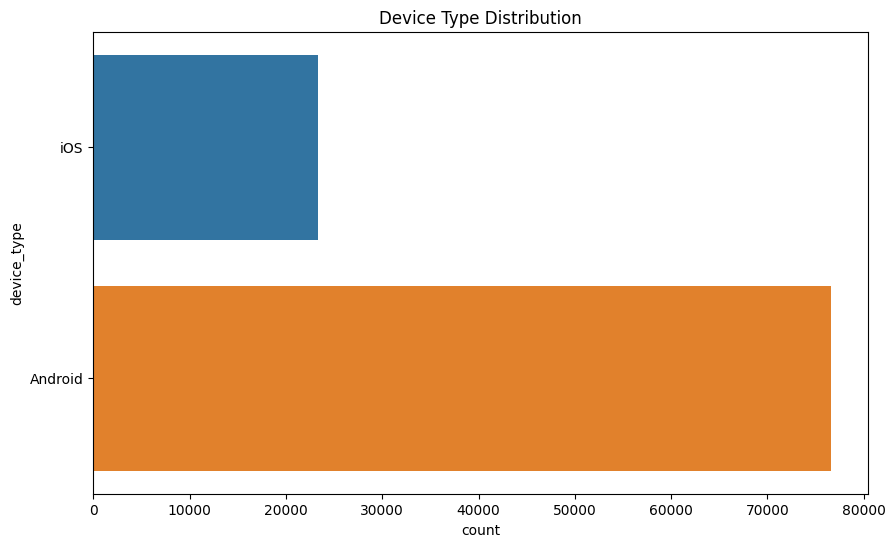

In [24]:
# 사용 기기 확인
plt.figure(figsize=(10, 6))
sns.countplot(y='device_type', data=customer)
plt.title('Device Type Distribution')
plt.show()

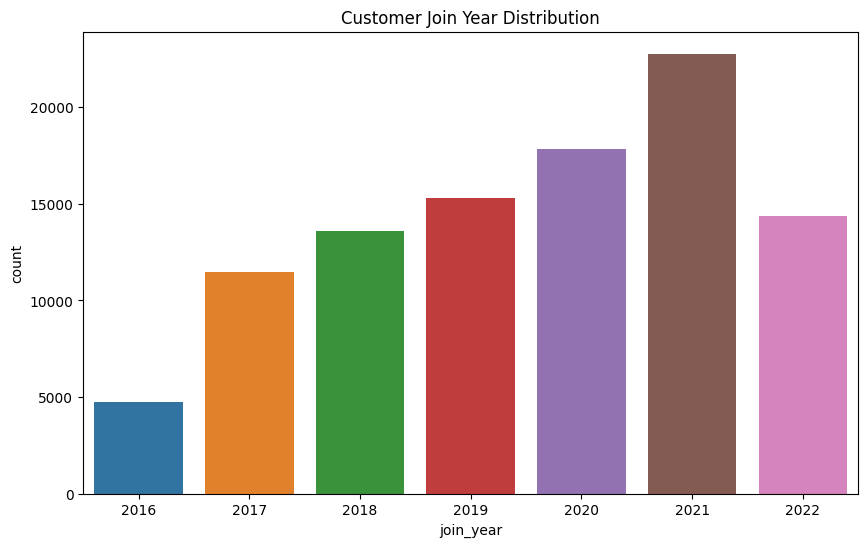

In [25]:
# 연도별 신규 가입자 수 확인 (가입자 수 추이 확인)
customer['first_join_date'] = pd.to_datetime(customer['first_join_date'])
customer['join_year'] = customer['first_join_date'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='join_year', data=customer)
plt.title('Customer Join Year Distribution')
plt.show()

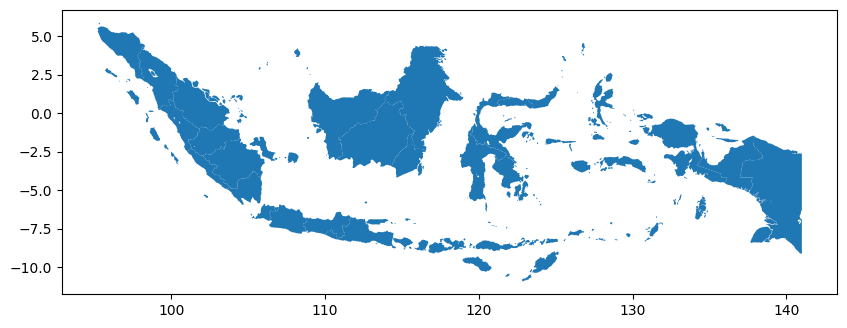

In [6]:
# 인도네시아 지도 가져오기
indonesia_map = gpd.read_file('https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province-simple.json')
# 시각화로 확인
indonesia_map.plot(figsize=(10, 10))
plt.show()

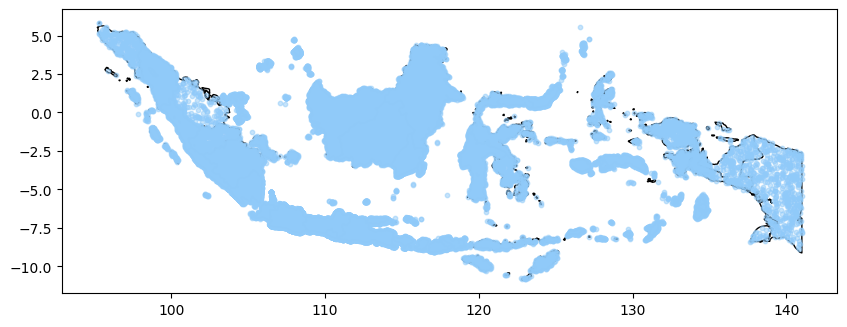

In [9]:
# 고객 거주지 정보 (위도, 경도) 지도에 표시
geometry = [Point(xy) for xy in zip(customer['home_location_long'], customer['home_location_lat'])]
geo_customer = gpd.GeoDataFrame(customer, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))
indonesia_map.plot(ax=ax, color='white', edgecolor='black')
geo_customer.plot(ax=ax, markersize=10, color='#90CAF9', alpha=0.5)
plt.show()

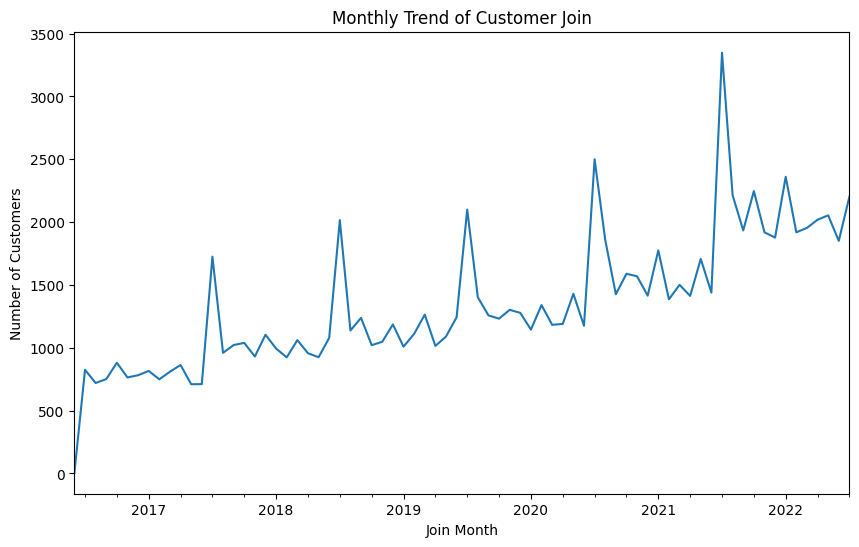

In [28]:
# 1. 월별 가입 트렌드 
customer['join_month'] = customer['first_join_date'].dt.to_period('M')
monthly_join = customer.groupby('join_month').size()
monthly_join.plot(kind='line', figsize=(10, 6))
plt.title('Monthly Trend of Customer Join')
plt.xlabel('Join Month')
plt.ylabel('Number of Customers')
plt.show()

### 3. transaction_customer EDA (구매 고객 데이터 확인용)


#### 3-1. 데이터 확인

In [ ]:
trans_cus = pd.read_csv("tranfinal_cus.csv")

In [30]:
pd.set_option('display.max_columns', None)
trans_cus.head()

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,가입 후 첫구매까지의 기간
0,NaN,2870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,-1.0
1,NaN,8193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,-1.0
2,2020-08-23 12:53:12,7279,2853.0,15000.0,844751.0,3.0,2 days 16:20:52,1fb6f149-05ef-4a22-ac1a-cd5d98cd5510,9d0496a6-37f7-4d0a-8a04-5850a12d00a6,WEEKENDSERU,LinkAja,Success,o,2020-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,0.0
3,2020-08-31 13:34:59,7279,0.0,10000.0,391341.0,1.0,3 days 16:14:02,eed52035-1f80-422c-b0ac-a1c814e77bcf,82396d8d-7d8a-436d-8e14-75f24aa35faa,Nopromo,LinkAja,Success,x,2018-10,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,8.0
4,2020-09-08 13:38:30,7279,0.0,0.0,154220.0,1.0,5 days 21:47:50,af568d06-c819-4ab4-a3e8-06857786ba10,348cc997-480b-467e-a502-1eed0f611e9d,Nopromo,LinkAja,Success,x,2021-09,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23,16.0


In [31]:
trans_cus[trans_cus['customer_id'] == 4774]

,created_at,customer_id,promo_amount,shipment_fee,total_amount,quantity,shipment_period,booking_id,session_id,promo_code,payment_method,payment_status,promo_yesno,created_at_2,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,가입 후 첫구매까지의 기간
228026,2018-07-30 12:40:22,4774,0.0,10000.0,155526.0,1.0,3 days 12:48:41,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Nopromo,Credit Card,Success,x,2018-01,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2.0
228027,2018-09-15 11:51:17,4774,0.0,10000.0,550696.0,4.0,2 days 20:50:32,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,Nopromo,OVO,Success,x,2019-02,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,49.0
228028,2018-11-01 11:23:48,4774,0.0,0.0,271012.0,1.0,4 days 06:18:39,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Nopromo,Credit Card,Success,x,2022-01,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,96.0
228029,2018-12-18 11:20:30,4774,0.0,0.0,198753.0,1.0,5 days 06:03:37,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Nopromo,Credit Card,Success,x,2021-07,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,143.0
228030,2019-02-03 11:25:55,4774,6369.0,5000.0,181865.0,1.0,3 days 23:16:04,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,WEEKENDMANTAP,Debit Card,Success,o,2021-08,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,190.0
228031,2019-03-22 11:53:02,4774,0.0,10000.0,306599.0,1.0,5 days 02:47:11,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,Nopromo,Credit Card,Success,x,2020-10,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,237.0
228032,2019-05-08 11:29:21,4774,0.0,10000.0,153913.0,1.0,2 days 08:40:37,0ed6730f-a5db-4e40-9a54-c343474d872c,e7eff973-b499-4b8d-9892-89e67e5fd7d4,Nopromo,Credit Card,Success,x,2020-03,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,284.0
228033,2019-06-24 12:08:52,4774,4019.0,10000.0,370757.0,1.0,3 days 22:25:44,6edd9366-4788-4bbb-ae5b-744e45e6118d,0d20c278-e082-4f28-9afe-8b5907d7a284,AZ2022,Credit Card,Success,o,2020-10,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,331.0
228034,2019-08-10 12:14:24,4774,9072.0,10000.0,1295740.0,6.0,4 days 05:52:40,771665e9-7df2-41c8-8168-16d5cdd407a1,f5352cdc-0e3c-4e77-af42-645501dcded4,WEEKENDSERU,Credit Card,Success,o,2021-03,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009

In [33]:
trans_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901879 entries, 0 to 901878
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   created_at          852584 non-null  object 
 1   customer_id         901879 non-null  int64  
 2   promo_amount        852584 non-null  float64
 3   shipment_fee        852584 non-null  float64
 4   total_amount        852584 non-null  float64
 5   quantity            852584 non-null  float64
 6   shipment_period     852584 non-null  object 
 7   booking_id          852584 non-null  object 
 8   session_id          852584 non-null  object 
 9   promo_code          852584 non-null  object 
 10  payment_method      852584 non-null  object 
 11  payment_status      852584 non-null  object 
 12  promo_yesno         852584 non-null  object 
 13  created_at_2        852584 non-null  object 
 14  first_name          901879 non-null  object 
 15  last_name           901879 non-nul

In [34]:
trans_cus.isna().sum()

created_at            49295
customer_id               0
promo_amount          49295
shipment_fee          49295
total_amount          49295
quantity              49295
shipment_period       49295
booking_id            49295
session_id            49295
promo_code            49295
payment_method        49295
payment_status        49295
promo_yesno           49295
created_at_2          49295
first_name                0
last_name                 0
username                  0
email                     0
gender                    0
birthdate                 0
device_type               0
device_id                 0
device_version            0
home_location_lat         0
home_location_long        0
home_location             0
home_country              0
first_join_date           0
가입 후 첫구매까지의 기간            0
dtype: int64

In [35]:
trans_cus['customer_id'].nunique()

100000

In [36]:
len(trans_cus)

901879

In [38]:
# created_at 컬럼이 결측치인지 아닌지에 대한 비율을 계산합니다.
total_entries = len(trans_cus)
missing_created_at = trans_cus['created_at'].isna().sum()
not_missing_created_at = total_entries - missing_created_at

missing_ratio = (missing_created_at / total_entries) * 100
not_missing_ratio = (not_missing_created_at / total_entries) * 100

print("Missing created_at ratio: {:.2f}%".format(missing_ratio))
print("Not missing created_at ratio: {:.2f}%".format(not_missing_ratio))

# customer_id 별로 묶어서 결측치가 있는지 없는지 확인합니다.
grouped_trans_cus = trans_cus.groupby('customer_id').apply(lambda x: x['created_at'].isna().any())
missing_customer = grouped_trans_cus.sum()
not_missing_customer = len(grouped_trans_cus) - missing_customer

print("Number of customers with missing created_at: ", missing_customer)
print("Number of customers without missing created_at: ", not_missing_customer)


Missing created_at ratio: 5.47%
Not missing created_at ratio: 94.53%
Number of customers with missing created_at:  49295
Number of customers without missing created_at:  50705


In [39]:
# 활동 고객과 비활동 고객 분리
active_customers = trans_cus[trans_cus['created_at'].notna()]['customer_id'].unique()
inactive_customers = trans_cus[trans_cus['created_at'].isna()]['customer_id'].unique()

print("Number of unique active customers: ", len(active_customers))
print("Number of unique inactive customers: ", len(inactive_customers))


Number of unique active customers:  50705
Number of unique inactive customers:  49295


In [40]:
active_customers

array([ 7279, 82542, 96453, ..., 72065, 32818, 40573], dtype=int64)

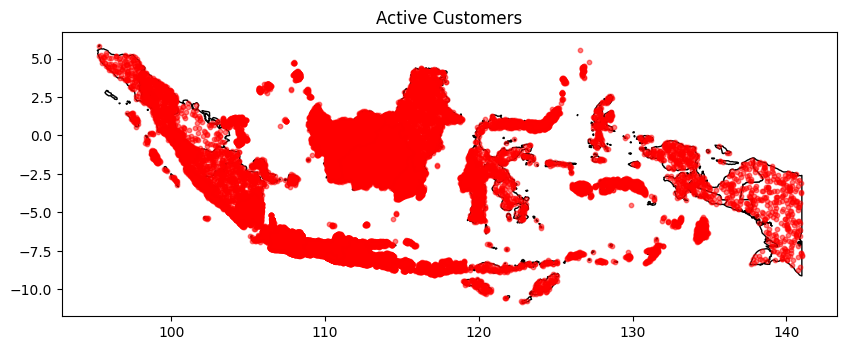

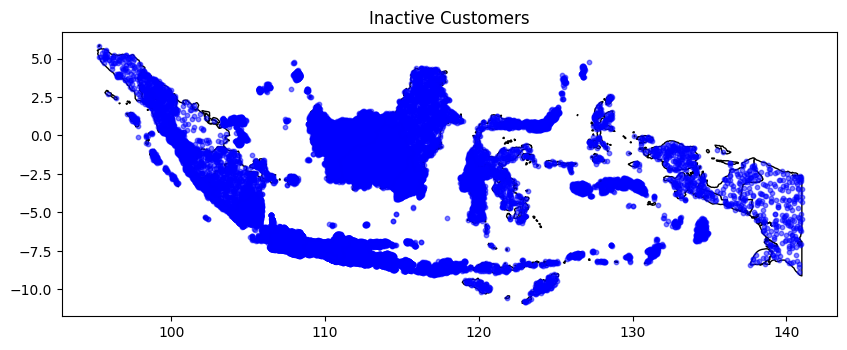

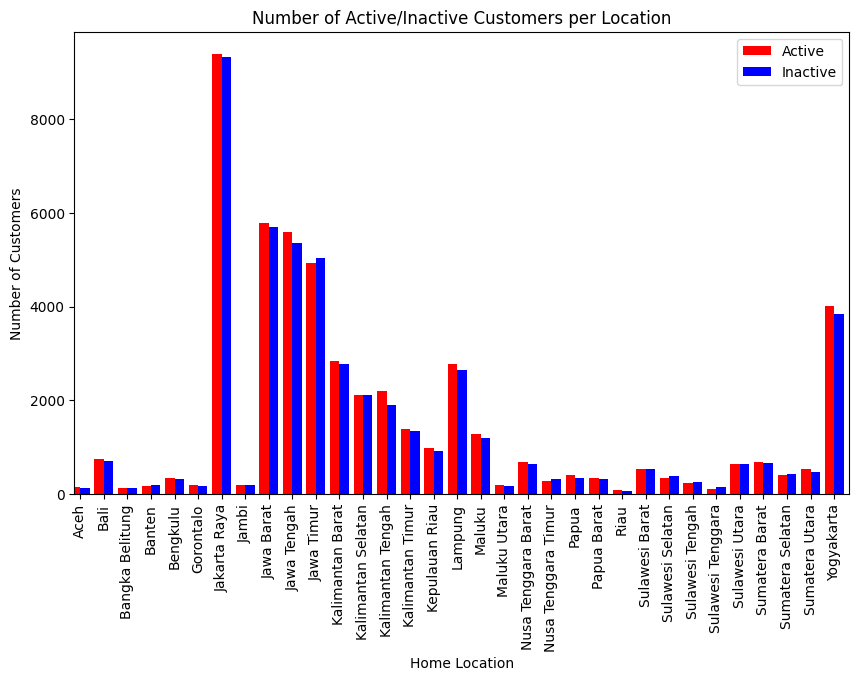

In [41]:
# 활동 고객과 비활동 고객 분리
active_customers = trans_cus[trans_cus['created_at'].notna()].drop_duplicates(subset='customer_id')
inactive_customers = trans_cus[trans_cus['created_at'].isna()].drop_duplicates(subset='customer_id')

# 인도네시아 지도 데이터 불러오기
indonesia_map = gpd.read_file('https://raw.githubusercontent.com/superpikar/indonesia-geojson/master/indonesia-province-simple.json')

# 활동 고객 위치 시각화
geometry_active = [Point(xy) for xy in zip(active_customers['home_location_long'], active_customers['home_location_lat'])]
geo_active_customer = gpd.GeoDataFrame(active_customers, geometry=geometry_active)
fig, ax = plt.subplots(figsize=(10, 10))
indonesia_map.plot(ax=ax, color='white', edgecolor='black')
geo_active_customer.plot(ax=ax, markersize=10, color='red', alpha=0.5)
plt.title("Active Customers")
plt.show()

# 비활동 고객 위치 시각화
geometry_inactive = [Point(xy) for xy in zip(inactive_customers['home_location_long'], inactive_customers['home_location_lat'])]
geo_inactive_customer = gpd.GeoDataFrame(inactive_customers, geometry=geometry_inactive)
fig, ax = plt.subplots(figsize=(10, 10))
indonesia_map.plot(ax=ax, color='white', edgecolor='black')
geo_inactive_customer.plot(ax=ax, markersize=10, color='blue', alpha=0.5)
plt.title("Inactive Customers")
plt.show()

# home_location에 따른 고객 수 시각화
fig, ax = plt.subplots(figsize=(10, 6))
active_customers['home_location'].value_counts().sort_index().plot(kind='bar', ax=ax, color='red', width=0.4, position=1, label='Active')
inactive_customers['home_location'].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue', width=0.4, position=0, label='Inactive')
plt.xlabel('Home Location')
plt.ylabel('Number of Customers')
plt.title('Number of Active/Inactive Customers per Location')
plt.legend()
plt.show()


In [42]:
active_customers['birthdate'] = pd.to_datetime(active_customers['birthdate'])
inactive_customers['birthdate'] = pd.to_datetime(inactive_customers['birthdate'])

print(active_customers['birthdate'].dtypes)
print(inactive_customers['birthdate'].dtypes)


datetime64[ns]
datetime64[ns]


In [43]:
from datetime import datetime

# 현재 연도를 구합니다.
current_year = datetime.now().year

# birthdate 컬럼에서 연도를 추출합니다.
active_customers['year_of_birth'] = active_customers['birthdate'].dt.year
inactive_customers['year_of_birth'] = inactive_customers['birthdate'].dt.year

# 나이를 계산합니다.
active_customers['age'] = current_year - active_customers['year_of_birth']
inactive_customers['age'] = current_year - inactive_customers['year_of_birth']

# 나이대의 최소값과 최대값을 확인합니다.
min_age = min(active_customers['age'].min(), inactive_customers['age'].min())
max_age = max(active_customers['age'].max(), inactive_customers['age'].max())

print("Minimum age: ", min_age)
print("Maximum age: ", max_age)



Minimum age:  7
Maximum age:  69


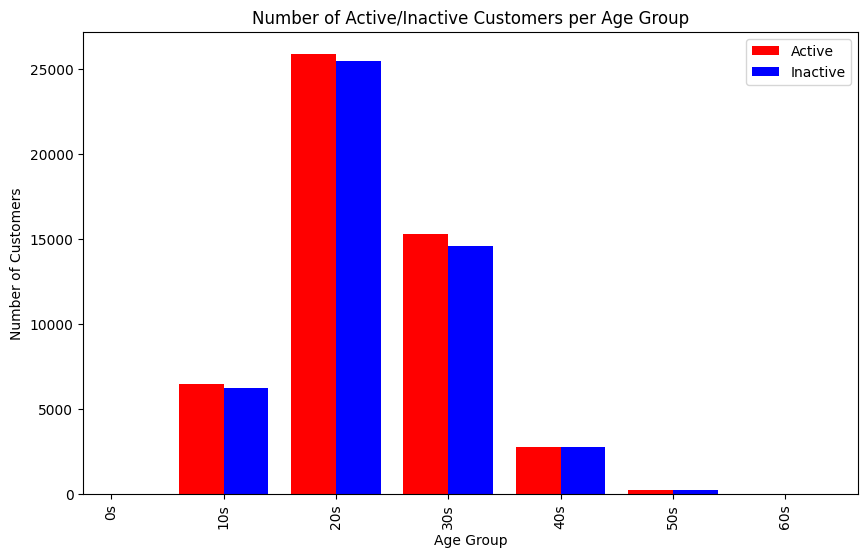

In [44]:
# 나이대를 구분합니다.
bins= list(range(0, max_age+10, 10)) # 최대 나이에 10을 더한 값까지 10의 간격으로 범위를 생성
labels = [f'{i}s' for i in bins[:-1]] # '10s', '20s' 등의 레이블을 생성
active_customers['AgeGroup'] = pd.cut(active_customers['age'], bins=bins, labels=labels, right=False)
inactive_customers['AgeGroup'] = pd.cut(inactive_customers['age'], bins=bins, labels=labels, right=False)

# 나이대에 따른 고객 수 시각화
fig, ax = plt.subplots(figsize=(10, 6))
active_customers['AgeGroup'].value_counts().sort_index().plot(kind='bar', ax=ax, color='red', width=0.4, position=1, label='Active')
inactive_customers['AgeGroup'].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue', width=0.4, position=0, label='Inactive')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Active/Inactive Customers per Age Group')
plt.legend()
plt.show()


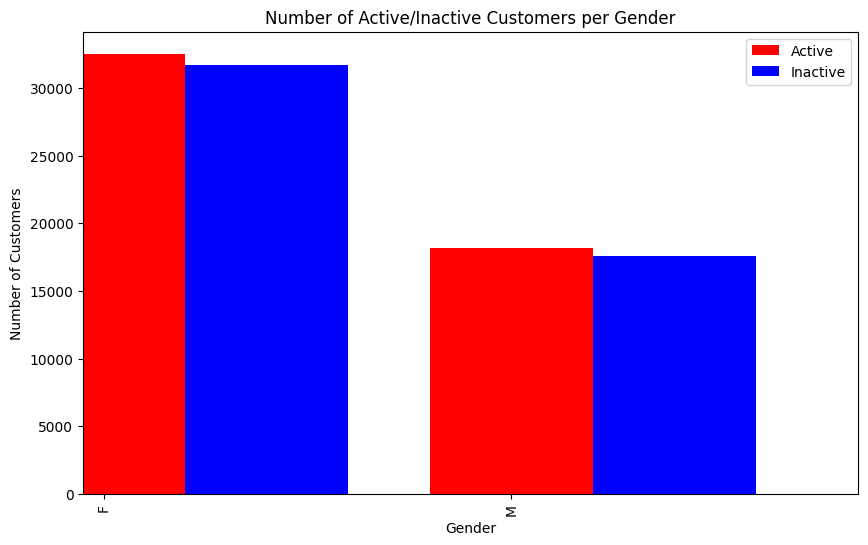

In [45]:
# 성별에 따른 고객 수 시각화
fig, ax = plt.subplots(figsize=(10, 6))

active_customers['gender'].value_counts().sort_index().plot(kind='bar', ax=ax, color='red', width=0.4, position=0.5, label='Active')
inactive_customers['gender'].value_counts().sort_index().plot(kind='bar', ax=ax, color='blue', width=0.4, position=-0.5, label='Inactive')

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Number of Active/Inactive Customers per Gender')
plt.legend()
plt.show()


In [46]:
active_customers['gender'].value_counts().sort_index()

gender
F    32548
M    18157
Name: count, dtype: int64

In [47]:
inactive_customers['gender'].value_counts().sort_index()

gender
F    31682
M    17613
Name: count, dtype: int64

### 4. new session (세션 재정의 후 EDA)

#### 4-1. session 재정의한 데이터 확인

In [48]:
new_session = pd.read_csv("new_session_id.csv")

In [49]:
new_session.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:19.510057+00:00,be5923a5-1dbe-4628-bab9-83603be31dfe,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16


In [50]:
new_session['session_id'].nunique()

5904346

In [51]:
# 2020.08.01부터 2022.07.31까지의 데이터만 필터링
new_session['event_time'] = pd.to_datetime(new_session['event_time'])
start_date = pd.to_datetime('2020-08-01', utc=True).tz_convert('UTC')
end_date = pd.to_datetime('2022-07-31', utc=True).tz_convert('UTC')
new_session = new_session[(new_session['event_time'] >= start_date) & (new_session['event_time'] <= end_date)]

In [52]:
# 정렬변경후 df에 저장
df = new_session.sort_values(['session_id', 'event_time'])

In [53]:
df.tail(20)

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time
7995226,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353934,HOMEPAGE,2020-11-10 17:01:12.117552+00:00,02daecde-be03-429e-b8c6-20c9aed7df88,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995227,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353935,PROMO_PAGE,2020-11-10 21:26:39.117552+00:00,b619458e-1048-4e19-ae46-f6e77f68f5a0,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995228,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353936,CLICK,2020-11-11 01:52:10.117552+00:00,fcad5bfd-4efc-4d2e-a2c1-c7bb435f5d8c,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995229,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353937,CLICK,2020-11-11 06:19:08.117552+00:00,8640ec35-c65e-4511-8681-4307597a63a8,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995230,ffffdf8e-dea1-42bc-9839-7662675c0d38_5353938,BOOKING,2020-11-11 14:59:29.117552+00:00,cb20e125-8eb1-4297-b373-161479f4baa6,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN,0 days 00:00:00
7995231,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353938,HOMEPAGE,2021-02-24 17:40:30.937313+00:00,17a38d8a-9504-4f1e-aaf9-b46488f301d2,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00
7995232,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353939,CLICK,2021-02-24 21:01:28.937313+00:00,23af47e2-4c99-45c9-a97f-1dd84fd6159d,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:07
7995233,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353939,ADD_TO_CART,2021-02-24 21:05:35.937313+00:00,c655c857-99b4-445f-8f3f-5e1abe8f6273,MOBILE,38677.0,1.0,366863.0,NaN,NaN,NaN,NaN,0 days 00:04:07
7995234,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353940,SCROLL,2021-02-25 00:23:50.937313+00:00,0f1a4dba-7ae7-45b5-a054-74ef2b1e60e1,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:03:25
7995235,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353940,ADD_PROMO,2021-02-25 00:27:15.937313+00:00,2b8c823c-2d11-43b8-a610-9522e5524666,MOBILE,NaN,NaN,NaN,NaN,NaN,AZ2022,10259.0,0 days 00:03:25


In [127]:
df.shape

(7995246, 14)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995246 entries, 0 to 7995245
Data columns (total 14 columns):
 #   Column           Dtype              
---  ------           -----              
 0   new_session_id   object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
 12  duration_time    timedelta64[ns]    
 13  session_id       object             
dtypes: datetime64[ns, UTC](1), float64(4), object(8), timedelta64[ns](1)
memory usage: 915.0+ MB


#### 4-2. EDA

##### 4-2-1. event 빈도 확인

In [56]:
df['session_id'].nunique()

5904346

In [57]:
event_count_new = df['event_name'].value_counts()
event_count_new

event_name
CLICK          1584462
HOMEPAGE       1553359
ADD_TO_CART    1136832
SCROLL         1063150
ITEM_DETAIL     820236
SEARCH          752464
BOOKING         531232
PROMO_PAGE      369538
ADD_PROMO       183973
Name: count, dtype: int64

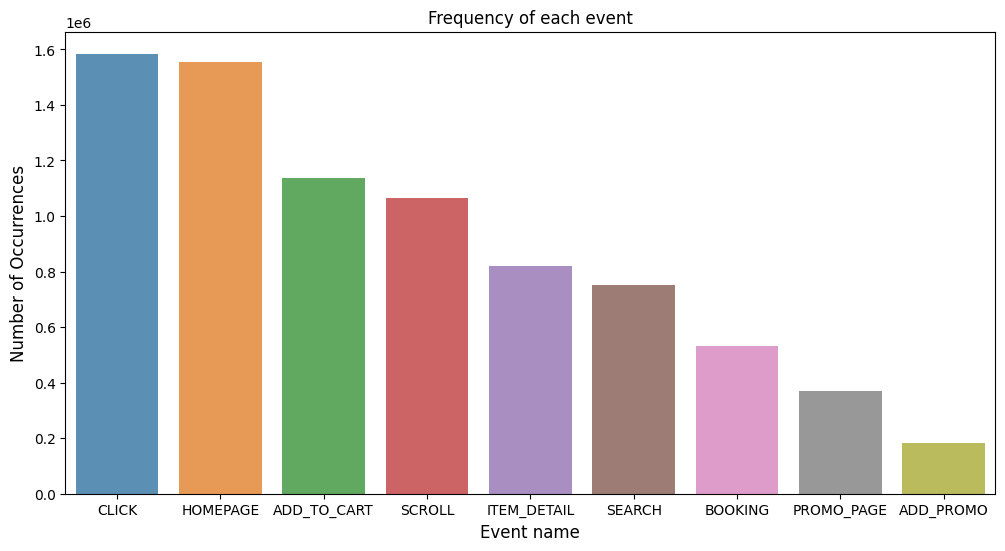

In [58]:
# 전체 이벤트 빈도 분포 확인
plt.figure(figsize=(12,6))
sns.barplot(x=event_count_new.index, y=event_count_new.values, alpha=0.8)
plt.title('Frequency of each event')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Event name', fontsize=12)
plt.show()

In [59]:
# 세션의 마지막 이벤트 빈도 확인
last_event_session_new = df.groupby('session_id')['event_name'].last()
last_event_session_new.value_counts()

event_name
HOMEPAGE       1235693
CLICK          1168090
SCROLL          790375
ADD_TO_CART     650949
ITEM_DETAIL     612370
SEARCH          554909
BOOKING         526213
PROMO_PAGE      275461
ADD_PROMO        90286
Name: count, dtype: int64

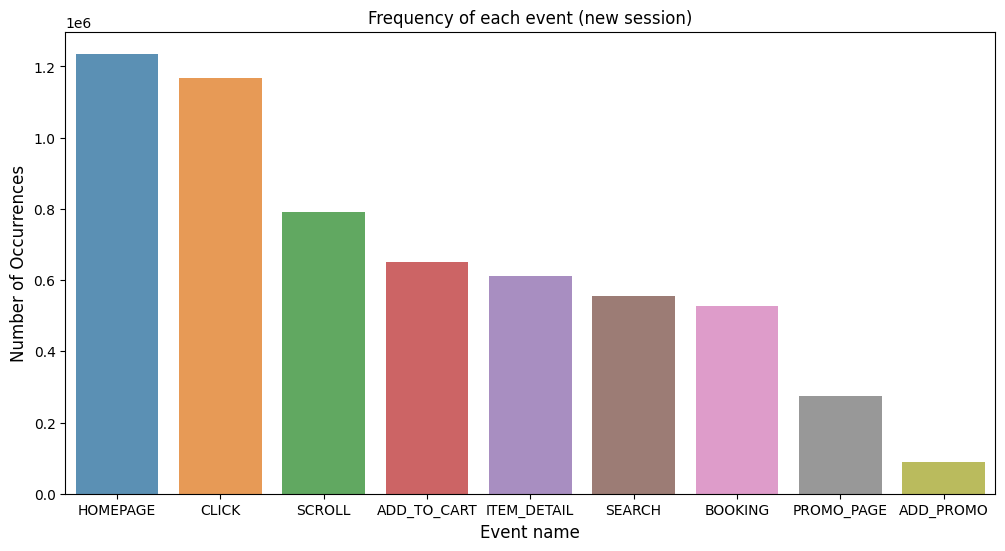

In [60]:
# 세션의 마지막 이벤트 빈도 분포 확인
last_event_count_new = last_event_session_new.value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=last_event_count_new.index, y=last_event_count_new.values, alpha=0.8)
plt.title('Frequency of each event (new session)')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Event name', fontsize=12)
plt.show()

In [61]:
len(df[df['event_name'] == 'BOOKING'])

531232

In [62]:
last_event_count_new.BOOKING

526213

In [63]:
sum(last_event_count_new)

5904346

In [64]:
booking_ratio = last_event_count_new.BOOKING / sum(last_event_count_new) * 100
booking_ratio

8.912299516322383

- 세션 재정의 후 세션별 마지막 이벤트 확인 : </br>
  `HOMEPAGE`, `CLICK`, `SCROLL` 순으로 많았고 `BOOKING`은 3번째로 낮음 </br>
  유저의 세션별 마지막 이벤트에서 `BOOKING`이 차치하는 비율은 8.91% </br>

##### 4-2-2. 체류시간(duration_time) 분석

###### - 데이터 확인 및 전처리

In [65]:
df.head()

,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:19.510057+00:00,be5923a5-1dbe-4628-bab9-83603be31dfe,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7995246 entries, 0 to 7995245
Data columns (total 13 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
 12  duration_time    object             
dtypes: datetime64[ns, UTC](1), float64(4), object(8)
memory usage: 854.0+ MB


In [67]:
# 'duration_time' 컬럼을 timedelta로 변환
df['duration_time'] = pd.to_timedelta(df['duration_time'])

print(df['duration_time'].dtype)

timedelta64[ns]


In [68]:
# 재정의한 세션의 컬럼을 new로 변경, 기존 session아이디를 새 컬럼 생성 후 추가
df = df.rename(columns={'session_id': 'new_session_id'})
df['session_id'] = df['new_session_id'].apply(lambda x: x[:36])
df.head()

,new_session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time,session_id
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,HOMEPAGE,2022-03-08 23:17:19.510057+00:00,be5923a5-1dbe-4628-bab9-83603be31dfe,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a


###### 4-2-2-1. 이상치&이벤트 제거 전 duration_time 통계 확인

In [69]:
# 1. 이상치와 이벤트 제거 전 duration_time 통계 확인

# new_session_id 기준으로 중복 제거
drop_s = df.drop_duplicates('new_session_id')
# duration_time의 통계 확인
drop_s['duration_time'].describe()

count                      5904346
mean     0 days 00:02:38.731764471
std      0 days 00:33:15.500688627
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max                4 days 10:16:06
Name: duration_time, dtype: object

In [70]:
drop_s['duration_time'].nunique()

43426

###### 4-2-2-2. 이상치만 제거했을 때 duration 통계 확인

In [71]:
# 2. duration_time이 6시간 이상인 경우 이상치로 판단하고 drop
six_hours = pd.Timedelta(hours=6)

drop_s_d = drop_s[drop_s['duration_time'] < six_hours ]
drop_s_d['duration_time'].describe()

count                      5895552
mean     0 days 00:01:37.381431875
std      0 days 00:12:45.196221524
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max                0 days 05:59:57
Name: duration_time, dtype: object

In [72]:
drop_s_d['duration_time'].nunique()

35598

###### 4-2-2-3. 이상치와 이벤트 모두 제거했을 때 duration_time 통계 확인

In [73]:
df_drop_d = df[df['duration_time'] < six_hours]
print(df_drop_d.shape)
print(df_drop_d.info())

(7637791, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 7637791 entries, 0 to 7995245
Data columns (total 14 columns):
 #   Column           Dtype              
---  ------           -----              
 0   new_session_id   object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
 12  duration_time    timedelta64[ns]    
 13  session_id       object             
dtypes: datetime64[ns, UTC](1), float64(4), object(8), timedelta64[ns](1)
memory usage: 874.1+ MB
None


In [129]:
# df_drop_d.to_csv("drop_outliter.csv", index=False)

In [74]:
# 'HOMEPAGE', 'PROMO_PAGE', 'ITEM_DETAIL' 이벤트를 포함하는 행들 제거
drop_events = ['HOMEPAGE', 'PROMO_PAGE', 'ITEM_DETAIL']
drop_outliter_events = df_drop_d[~df_drop_d['event_name'].isin(drop_events)]


In [75]:
drop_outliter_events.shape

(5026116, 14)

In [76]:
drop_o_e_s = drop_outliter_events.drop_duplicates('new_session_id')
drop_o_e_s['duration_time'].describe()

count                      3908612
mean     0 days 00:02:26.193600299
std      0 days 00:15:35.020923695
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max                0 days 05:59:57
Name: duration_time, dtype: object

###### 4-2-2-4. 3가지(제거전,이상치제거,이상치&이벤트 모두제거) 통계 비교

In [77]:
print('★ 이상치와 불필요한 이벤트 제거 후 체류시간 분석')
print('-----------------------------------------------------')
print(f'★ 이상치 제거 전 duration_time 유니크 수 : {drop_s.duration_time.nunique()}')
print(f'★ 이상치 제거 후 duration_time 유니크 수 : {drop_s_d.duration_time.nunique()}')
print(f'★ 3개 이벤트 제거 후 duration_time 유니크 수 : {drop_o_e_s.duration_time.nunique()}')
print('-----------------------------------------------------')
print(f'★ 이상치 제거 전 duration_time 통계 :', '\n', f'{drop_s.duration_time.describe()}', '\n')
print(f'★ 이상치 제거 후 duration_time 통계 :', '\n', f'{drop_s_d.duration_time.describe()}', '\n')
print(f'★ 이상치 & 3개 이벤트 제거 후 duration_time 통계 :', '\n', f'{drop_o_e_s.duration_time.describe()}')
print('-----------------------------------------------------')


★ 이상치와 불필요한 이벤트 제거 후 체류시간 분석
-----------------------------------------------------
★ 이상치 제거 전 duration_time 유니크 수 : 43426
★ 이상치 제거 후 duration_time 유니크 수 : 35598
★ 3개 이벤트 제거 후 duration_time 유니크 수 : 35595
-----------------------------------------------------
★ 이상치 제거 전 duration_time 통계 : 
 count                      5904346
mean     0 days 00:02:38.731764471
std      0 days 00:33:15.500688627
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max                4 days 10:16:06
Name: duration_time, dtype: object 

★ 이상치 제거 후 duration_time 통계 : 
 count                      5895552
mean     0 days 00:01:37.381431875
std      0 days 00:12:45.196221524
min                0 days 00:00:00
25%                0 days 00:00:00
50%                0 days 00:00:00
75%                0 days 00:00:00
max                0 days 05:59:57
Name: duration_time, dtype: object 

★ 이상치 & 3개 이벤트 제거 후 duration_time 통계 : 
 coun

In [78]:
drop_outliter_events.head()

,new_session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time,session_id
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a
5,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:36.510057+00:00,12327385-a238-4500-8f06-6d123f01d0a3,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a


###### 4-2-2-5. 체류시간에 따른 구매전환율 확인

In [79]:
drop_outliter_events.shape

(5026116, 14)

In [80]:
drop_outliter_events = drop_outliter_events.reset_index()
drop_outliter_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026116 entries, 0 to 5026115
Data columns (total 15 columns):
 #   Column           Dtype              
---  ------           -----              
 0   index            int64              
 1   new_session_id   object             
 2   event_name       object             
 3   event_time       datetime64[ns, UTC]
 4   event_id         object             
 5   traffic_source   object             
 6   product_id       float64            
 7   quantity         float64            
 8   item_price       float64            
 9   payment_status   object             
 10  search_keywords  object             
 11  promo_code       object             
 12  promo_amount     float64            
 13  duration_time    timedelta64[ns]    
 14  session_id       object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(8), timedelta64[ns](1)
memory usage: 575.2+ MB


In [81]:
# 새로운 데이터프레임에 복사 -> Pandas에서 DataFrame의 일부를 복사하여 작업할 때, 원본 DataFrame이 변경되지 않도록 하기 위해 경고가 출력됨.
df_new = drop_outliter_events.copy()

# timedelta를 초 단위로 변환
df_new['duration_seconds'] = df_new['duration_time'].dt.total_seconds()

# 30초 단위의 구간을 만들기
bins = np.arange(0, df_new['duration_seconds'].max() + 30, 30)
labels = [f'{i}s-{i+30}s' for i in range(0, int(df_new['duration_seconds'].max()), 30)]

df_new['duration_group'] = pd.cut(df_new['duration_seconds'], bins=bins, labels=labels, include_lowest=True)

# 'payment_status'가 'Success'인 세션만 구매로 간주
df_new['is_purchase'] = df_new['payment_status'] == 'Success'

# 각 구간에서의 구매 전환율 계산
conversion_rate = df_new.groupby('duration_group')['is_purchase'].mean() * 100

print(conversion_rate)



duration_group
0s-30s           14.406092
30s-60s           0.351361
60s-90s           0.358628
90s-120s          0.352306
120s-150s         0.415853
                   ...    
21450s-21480s     1.186944
21480s-21510s     0.980392
21510s-21540s     0.000000
21540s-21570s     1.886792
21570s-21600s     1.898734
Name: is_purchase, Length: 720, dtype: float64


In [82]:
conversion_rate.mean()

3.2967475780583273

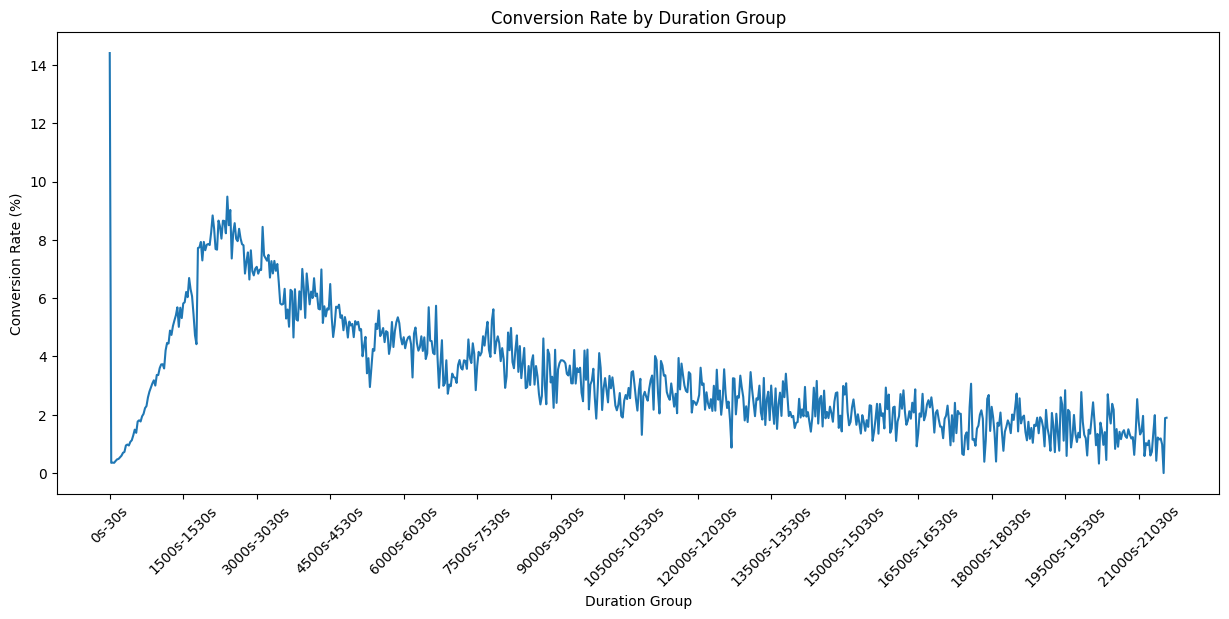

In [84]:
# x축 가독성을 위해 출력 구간 간격 만들기
plt.figure(figsize=(15, 6))
sns.lineplot(x='duration_group', y='is_purchase', data=data)
plt.xticks(rotation=45, ticks=data.index[::50])  # x 축 라벨 50개 구간으로 나눠 표시
plt.title('Conversion Rate by Duration Group')
plt.xlabel('Duration Group')
plt.ylabel('Conversion Rate (%)')
plt.show()


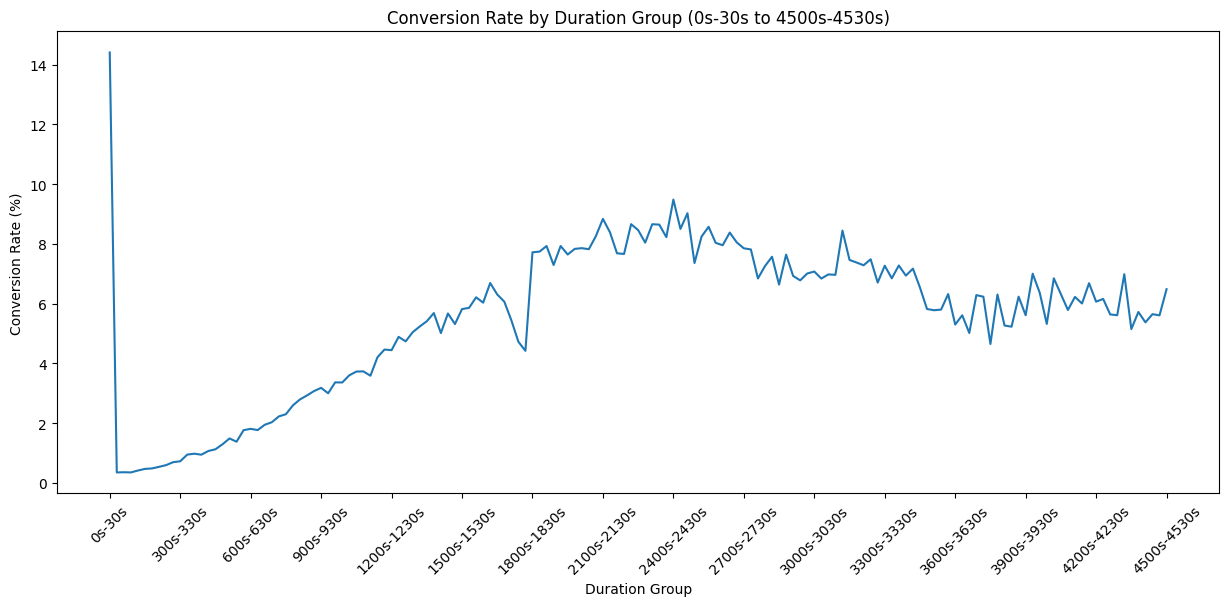

In [85]:
# 0s-30s 부터 4500s-4530s 구간까지의 행은 처음부터 150번째 행까지입니다. 
# 그러므로 슬라이싱을 이용하여 이 구간의 데이터를 선택합니다.
data_filtered = data.iloc[:151]

# 그래프 그리기
plt.figure(figsize=(15, 6))
sns.lineplot(x='duration_group', y='is_purchase', data=data_filtered)
plt.xticks(rotation=45, ticks=data_filtered.index[::10])  # x 축 라벨 10개 구간으로 나눠 표시
plt.title('Conversion Rate by Duration Group (0s-30s to 4500s-4530s)')
plt.xlabel('Duration Group')
plt.ylabel('Conversion Rate (%)')
plt.show()


In [86]:
data_filtered

,duration_group,is_purchase
0,0s-30s,14.406092
1,30s-60s,0.351361
2,60s-90s,0.358628
3,90s-120s,0.352306
4,120s-150s,0.415853
...,...,...
146,4380s-4410s,5.720824
147,4410s-4440s,5.374280
148,4440s-4470s,5.647517
149,4470s-4500s,5.608283


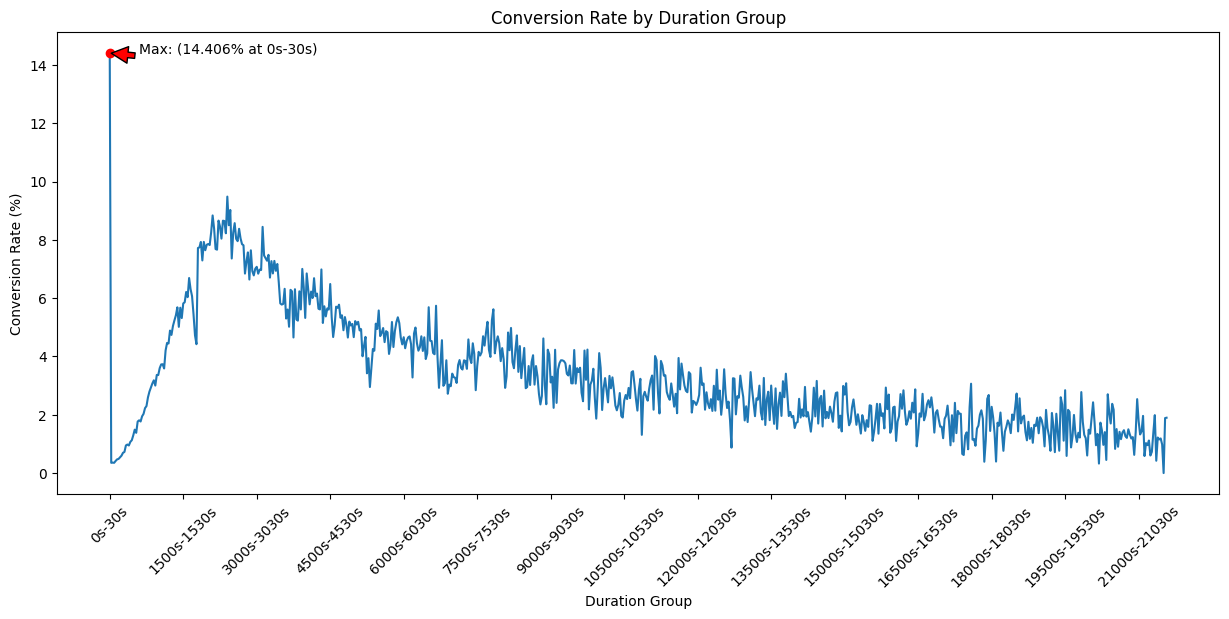

In [87]:
# 최대 구매 전환율을 가진 체류시간 그룹 표시

plt.figure(figsize=(15, 6))
sns.lineplot(x='duration_group', y='is_purchase', data=data)
plt.xticks(rotation=45, ticks=data.index[::50])  # x 축 라벨 10개 구간으로 나눠 표시

# 최대 구매 전환율을 가진 지점 찾기
max_conversion_rate = data_filtered['is_purchase'].max()
max_conversion_rate_index = data_filtered['is_purchase'].idxmax()
max_group_name = data_filtered.loc[max_conversion_rate_index, 'duration_group']

# 최대 구매 전환율을 가진 지점에 점 추가
plt.plot(max_conversion_rate_index, max_conversion_rate, 'ro')

# 최대 구매 전환율을 가진 지점에 어노테이션 추가
plt.annotate(f'Max: ({max_conversion_rate:.3f}% at {max_group_name})', 
             xy=(max_conversion_rate_index, max_conversion_rate), 
             xytext=(max_conversion_rate_index+20, max_conversion_rate),  # 텍스트 위치 변경
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Conversion Rate by Duration Group')
plt.xlabel('Duration Group')
plt.ylabel('Conversion Rate (%)')
plt.show()

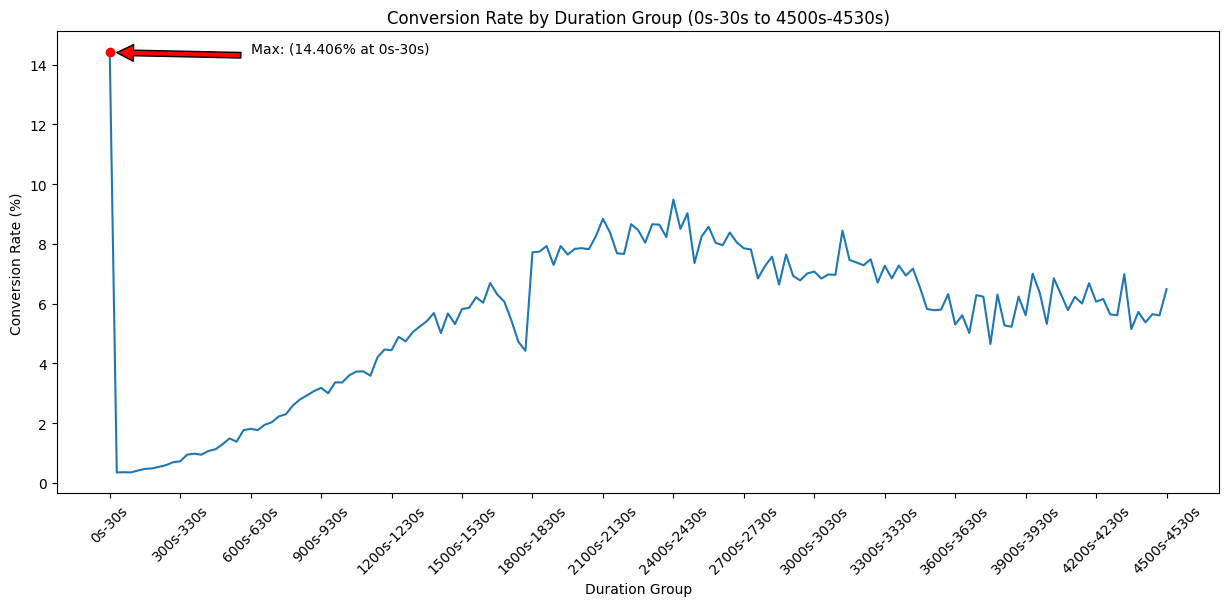

In [88]:
# 0s-30s 부터 4500s-4530s 구간까지
# 최대 구매 전환율을 가진 체류시간 그룹 표시

plt.figure(figsize=(15, 6))
sns.lineplot(x='duration_group', y='is_purchase', data=data_filtered)
plt.xticks(rotation=45, ticks=data_filtered.index[::10])  # x 축 라벨 10개 구간으로 나눠 표시

# 최대 구매 전환율을 가진 지점 찾기
max_conversion_rate = data_filtered['is_purchase'].max()
max_conversion_rate_index = data_filtered['is_purchase'].idxmax()
max_group_name = data_filtered.loc[max_conversion_rate_index, 'duration_group']

# 최대 구매 전환율을 가진 지점에 점 추가
plt.plot(max_conversion_rate_index, max_conversion_rate, 'ro')

# 최대 구매 전환율을 가진 지점에 어노테이션 추가
plt.annotate(f'Max: ({max_conversion_rate:.3f}% at {max_group_name})', 
             xy=(max_conversion_rate_index, max_conversion_rate), 
             xytext=(max_conversion_rate_index+20, max_conversion_rate),  # 텍스트 위치 변경
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Conversion Rate by Duration Group (0s-30s to 4500s-4530s)')
plt.xlabel('Duration Group')
plt.ylabel('Conversion Rate (%)')
plt.show()


In [89]:
print(max_conversion_rate)
print(max_group_name)

14.406092402848545
0s-30s


In [90]:
df_new[df_new['duration_time'] == '0 days 00:00:00']

,index,new_session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time,session_id,duration_seconds,duration_group,is_purchase
89,123,00008e68-a4d4-4b5d-ab7a-9fbd44f7b7fd_3,BOOKING,2021-03-10 13:15:34.110664+00:00,637d4f03-bda6-43c7-8c92-d141790e50ff,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN,0 days,00008e68-a4d4-4b5d-ab7a-9fbd44f7b7fd,0.0,0s-30s,True
92,127,0000a729-3de3-4613-9022-d12b7fa06e75_5,CLICK,2022-04-04 09:41:27.273818+00:00,90da8a45-ef04-4e01-82cb-3fee57c922a2,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days,0000a729-3de3-4613-9022-d12b7fa06e75,0.0,0s-30s,False
93,128,0000a729-3de3-4613-9022-d12b7fa06e75_6,BOOKING,2022-04-09 02:02:54.273818+00:00,d497c41f-3127-4f2d-9dd6-511aa519e023,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN,0 days,0000a729-3de3-4613-9022-d12b7fa06e75,0.0,0s-30s,True
94,134,0000b1a6-8dca-4fb3-b1db-ccde1791a330_10,CLICK,2021-02-06 23:44:01.386424+00:00,cd74073b-791e-41b3-8a7e-4adaafd2ecfa,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days,0000b1a6-8dca-4fb3-b1db-ccde1791a330,0.0,0s-30s,False
95,137,0000b1a6-8dca-4fb3-b1db-ccde1791a330_13,CLICK,2021-02-07 11:18:56.386424+00:00,08f8ee76-db6e-4842-b683-00d4332cc996,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days,0000b1a6-8dca-4fb3-b1db-ccde1791a330,0.0,0s-30s,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026111,7995240,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353945,ADD_TO_CART,2021-02-25 17:14:37.937313+00:00,1b18137e-c9c3-49e4-acf7-d1d8ab43f678,MOBILE,49545.0,1.0,231356.0,NaN,NaN,NaN,NaN,0 days,fffff7cf-2a18-4303-9c12-aa836ae3b543,0.0,0s-30s,False
5026112,7995242,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353947,SEARCH,2021-02-25 23:57:56.937313+00:00,0204f1b5-bf62-4352-927b-89c56c91944c,MOBILE,NaN,NaN,NaN,NaN,옷,NaN,NaN,0 days,fffff7cf-2a18-4303-9c12-aa836ae3b543,0.0,0s-30s,False
5026113,7995243,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353948,ADD_TO_CART,2021-02-26 03:20:58.937313+00:00,e26f5ef9-5b4c-4d79-937e-6c79493c5de5,MOBILE,42693.0,1.0,383436.0,NaN,NaN,NaN,NaN,0 days,fffff7cf-2a18-4303-9c12-aa836ae3b543,0.0,0s-30s,False
5026114,7995244,fffff7cf-2a18-4303-9c12-aa836ae3b543_5353949,ADD_TO_CART,2021-02-26 06:42:58.937313+00:00,59087da2-c432-4382-850e-a3ab1fae034a,MOBILE,20603.0,1.0,294065.0,NaN,NaN,NaN,NaN,0 days,fffff7cf-2a18-4303-9c12-aa836ae3b543,0.0,0s-30s,False


##### 4-2-3. 이탈률 

In [92]:
print(df[(df['duration_time'] == '0 days 00:00:00') & (df['event_name'] == 'HOMEPAGE')].count(), '\n')
print('------------------------------------')
print(df[(df['duration_time'] == '0 days 00:00:00') & (df['event_name'] == 'BOOKING')].count(), '\n')
print('------------------------------------')
print(df[(df['duration_time'] == '0 days 00:00:00') & (df['payment_status'] == 'Success')].count(), '\n')
print('------------------------------------')
print(df[(df['payment_status'] == 'Success')].count(), '\n')

new_session_id     1181835
event_name         1181835
event_time         1181835
event_id           1181835
traffic_source     1181835
product_id               0
quantity                 0
item_price               0
payment_status           0
search_keywords          0
promo_code               0
promo_amount             0
duration_time      1181835
session_id         1181835
dtype: int64 

------------------------------------
new_session_id     485171
event_name         485171
event_time         485171
event_id           485171
traffic_source     485171
product_id              0
quantity                0
item_price              0
payment_status     485171
search_keywords         0
promo_code              0
promo_amount            0
duration_time      485171
session_id         485171
dtype: int64 

------------------------------------
new_session_id     464141
event_name         464141
event_time         464141
event_id           464141
traffic_source     464141
product_id              

In [93]:
# 이탈률 → 세션_id 별로 체류시간이 0초인 것에 대해 event가 promo_page, home_page, item_detail인 경우 / 총 세션 수

# 다음 동작이 없을때 이탈로 보는 event 3가지 갯수 카운트
zero_homepage = len(df[(df['duration_time'] == '0 days 00:00:00') & (df['event_name'] == 'HOMEPAGE')])
zero_promo_page = len(df[(df['duration_time'] == '0 days 00:00:00') & (df['event_name'] == 'PROMO_PAGE')])
zero_item_detail = len(df[(df['duration_time'] == '0 days 00:00:00') & (df['event_name'] == 'ITEM_DETAIL')])

exception_three = zero_homepage + zero_promo_page + zero_item_detail

# 이탈률 (이탈 event / 총 세션수 * 100)
cv_ratio = exception_three / df['new_session_id'].nunique() * 100
print(f'이탈률 : {cv_ratio:.3f}')

이탈률 : 33.644


In [94]:
df[(df['duration_time'] == '0 days 00:00:00')]['event_name'].value_counts()

event_name
HOMEPAGE       1181835
CLICK          1053399
SCROLL          716921
ITEM_DETAIL     556160
SEARCH          502300
BOOKING         485171
ADD_TO_CART     318832
PROMO_PAGE      248488
ADD_PROMO        18835
Name: count, dtype: int64

In [95]:
df['new_session_id'].nunique()

5904346

### 5. new_session_product

#### 5-1. 데이터 확인 및 병합

In [96]:
product = product.rename(columns={'id': 'product_id'})


In [97]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [98]:
df_session_pro = pd.merge(drop_outliter_events, product, on='product_id', how='left')

In [99]:
df_session_pro.head()

,index,new_session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time,session_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,1,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,Men,Apparel,Topwear,Jackets,Black,Fall,2011.0,Sports,Nike Men As Sideline J Black Jackets
2,3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:36.510057+00:00,12327385-a238-4500-8f06-6d123f01d0a3,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 5-2. 전처리

In [100]:
df_session_pro.drop(['index'], axis=1, inplace=True)
df_session_pro.head()

,new_session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,duration_time,session_id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:22.510057+00:00,b127018a-f240-4f79-a635-5a7a1ba3245a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00005746-17ec-449c-9c5c-699a3ea9304a_1,ADD_TO_CART,2022-03-08 23:17:23.510057+00:00,f86c461a-7832-463f-bad9-6af354ee54da,MOBILE,9980.0,6.0,205309.0,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,Men,Apparel,Topwear,Jackets,Black,Fall,2011.0,Sports,Nike Men As Sideline J Black Jackets
2,00005746-17ec-449c-9c5c-699a3ea9304a_1,SCROLL,2022-03-08 23:17:25.510057+00:00,b321d2f0-13b0-4a47-ae9b-c58ed2cadd59,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00005746-17ec-449c-9c5c-699a3ea9304a_1,SEARCH,2022-03-08 23:17:32.510057+00:00,1770c2e0-0393-480d-a9e8-728ea654a51f,MOBILE,NaN,NaN,NaN,NaN,셔츠,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00005746-17ec-449c-9c5c-699a3ea9304a_1,CLICK,2022-03-08 23:17:36.510057+00:00,12327385-a238-4500-8f06-6d123f01d0a3,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:04:16,00005746-17ec-449c-9c5c-699a3ea9304a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:

# 병합 데이터에 체류시간 관련 컬럼이 누락되어 다시 추가
df_session_pro['duration_seconds'] = df_session_pro['duration_time'].dt.total_seconds()

bins = np.arange(0, df_session_pro['duration_seconds'].max() + 30, 30)
labels = [f'{i}s-{i+30}s' for i in range(0, int(df_session_pro['duration_seconds'].max()), 30)]

df_session_pro['duration_group'] = pd.cut(df_session_pro['duration_seconds'], bins=bins, labels=labels, include_lowest=True)

df_session_pro['is_purchase'] = df_session_pro['payment_status'] == 'Success'

In [102]:
df_session_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5026116 entries, 0 to 5026115
Data columns (total 26 columns):
 #   Column              Dtype              
---  ------              -----              
 0   new_session_id      object             
 1   event_name          object             
 2   event_time          datetime64[ns, UTC]
 3   event_id            object             
 4   traffic_source      object             
 5   product_id          float64            
 6   quantity            float64            
 7   item_price          float64            
 8   payment_status      object             
 9   search_keywords     object             
 10  promo_code          object             
 11  promo_amount        float64            
 12  duration_time       timedelta64[ns]    
 13  session_id          object             
 14  gender              object             
 15  masterCategory      object             
 16  subCategory         object             
 17  articleType         object 

#### 5-3. 체류시간에 따른 구매전환율 상위&하위 그룹 분석

In [ ]:
# 체류시간 그룹을 0s-30s 부터 4500s-4530s까지로 제한
df_filtered = df_new[df_new['duration_group'].isin(data_filtered['duration_group'])]

# 체류시간 그룹별 이벤트 빈도 계산
event_freq_by_group = df_filtered.groupby(['duration_group', 'event_name']).size().reset_index(name='count')

# 구매 전환율 상위 10개의 체류 그룹에 대한 이벤트 빈도 분석
top_conversion_groups = data_filtered.sort_values('is_purchase', ascending=False).iloc[:10]['duration_group']
df_top_conversion = df_filtered[df_filtered['duration_group'].isin(top_conversion_groups)]

# 이벤트 빈도 계산
event_freq_top_conversion = df_top_conversion.groupby(['duration_group', 'event_name']).size().reset_index(name='count')

In [104]:
top_conversion_groups

0          0s-30s
80    2400s-2430s
82    2460s-2490s
70    2100s-2130s
74    2220s-2250s
77    2310s-2340s
78    2340s-2370s
85    2550s-2580s
81    2430s-2460s
75    2250s-2280s
Name: duration_group, dtype: category
Categories (720, object): ['0s-30s' < '30s-60s' < '60s-90s' < '90s-120s' ... '21480s-21510s' < '21510s-21540s' < '21540s-21570s' < '21570s-21600s']

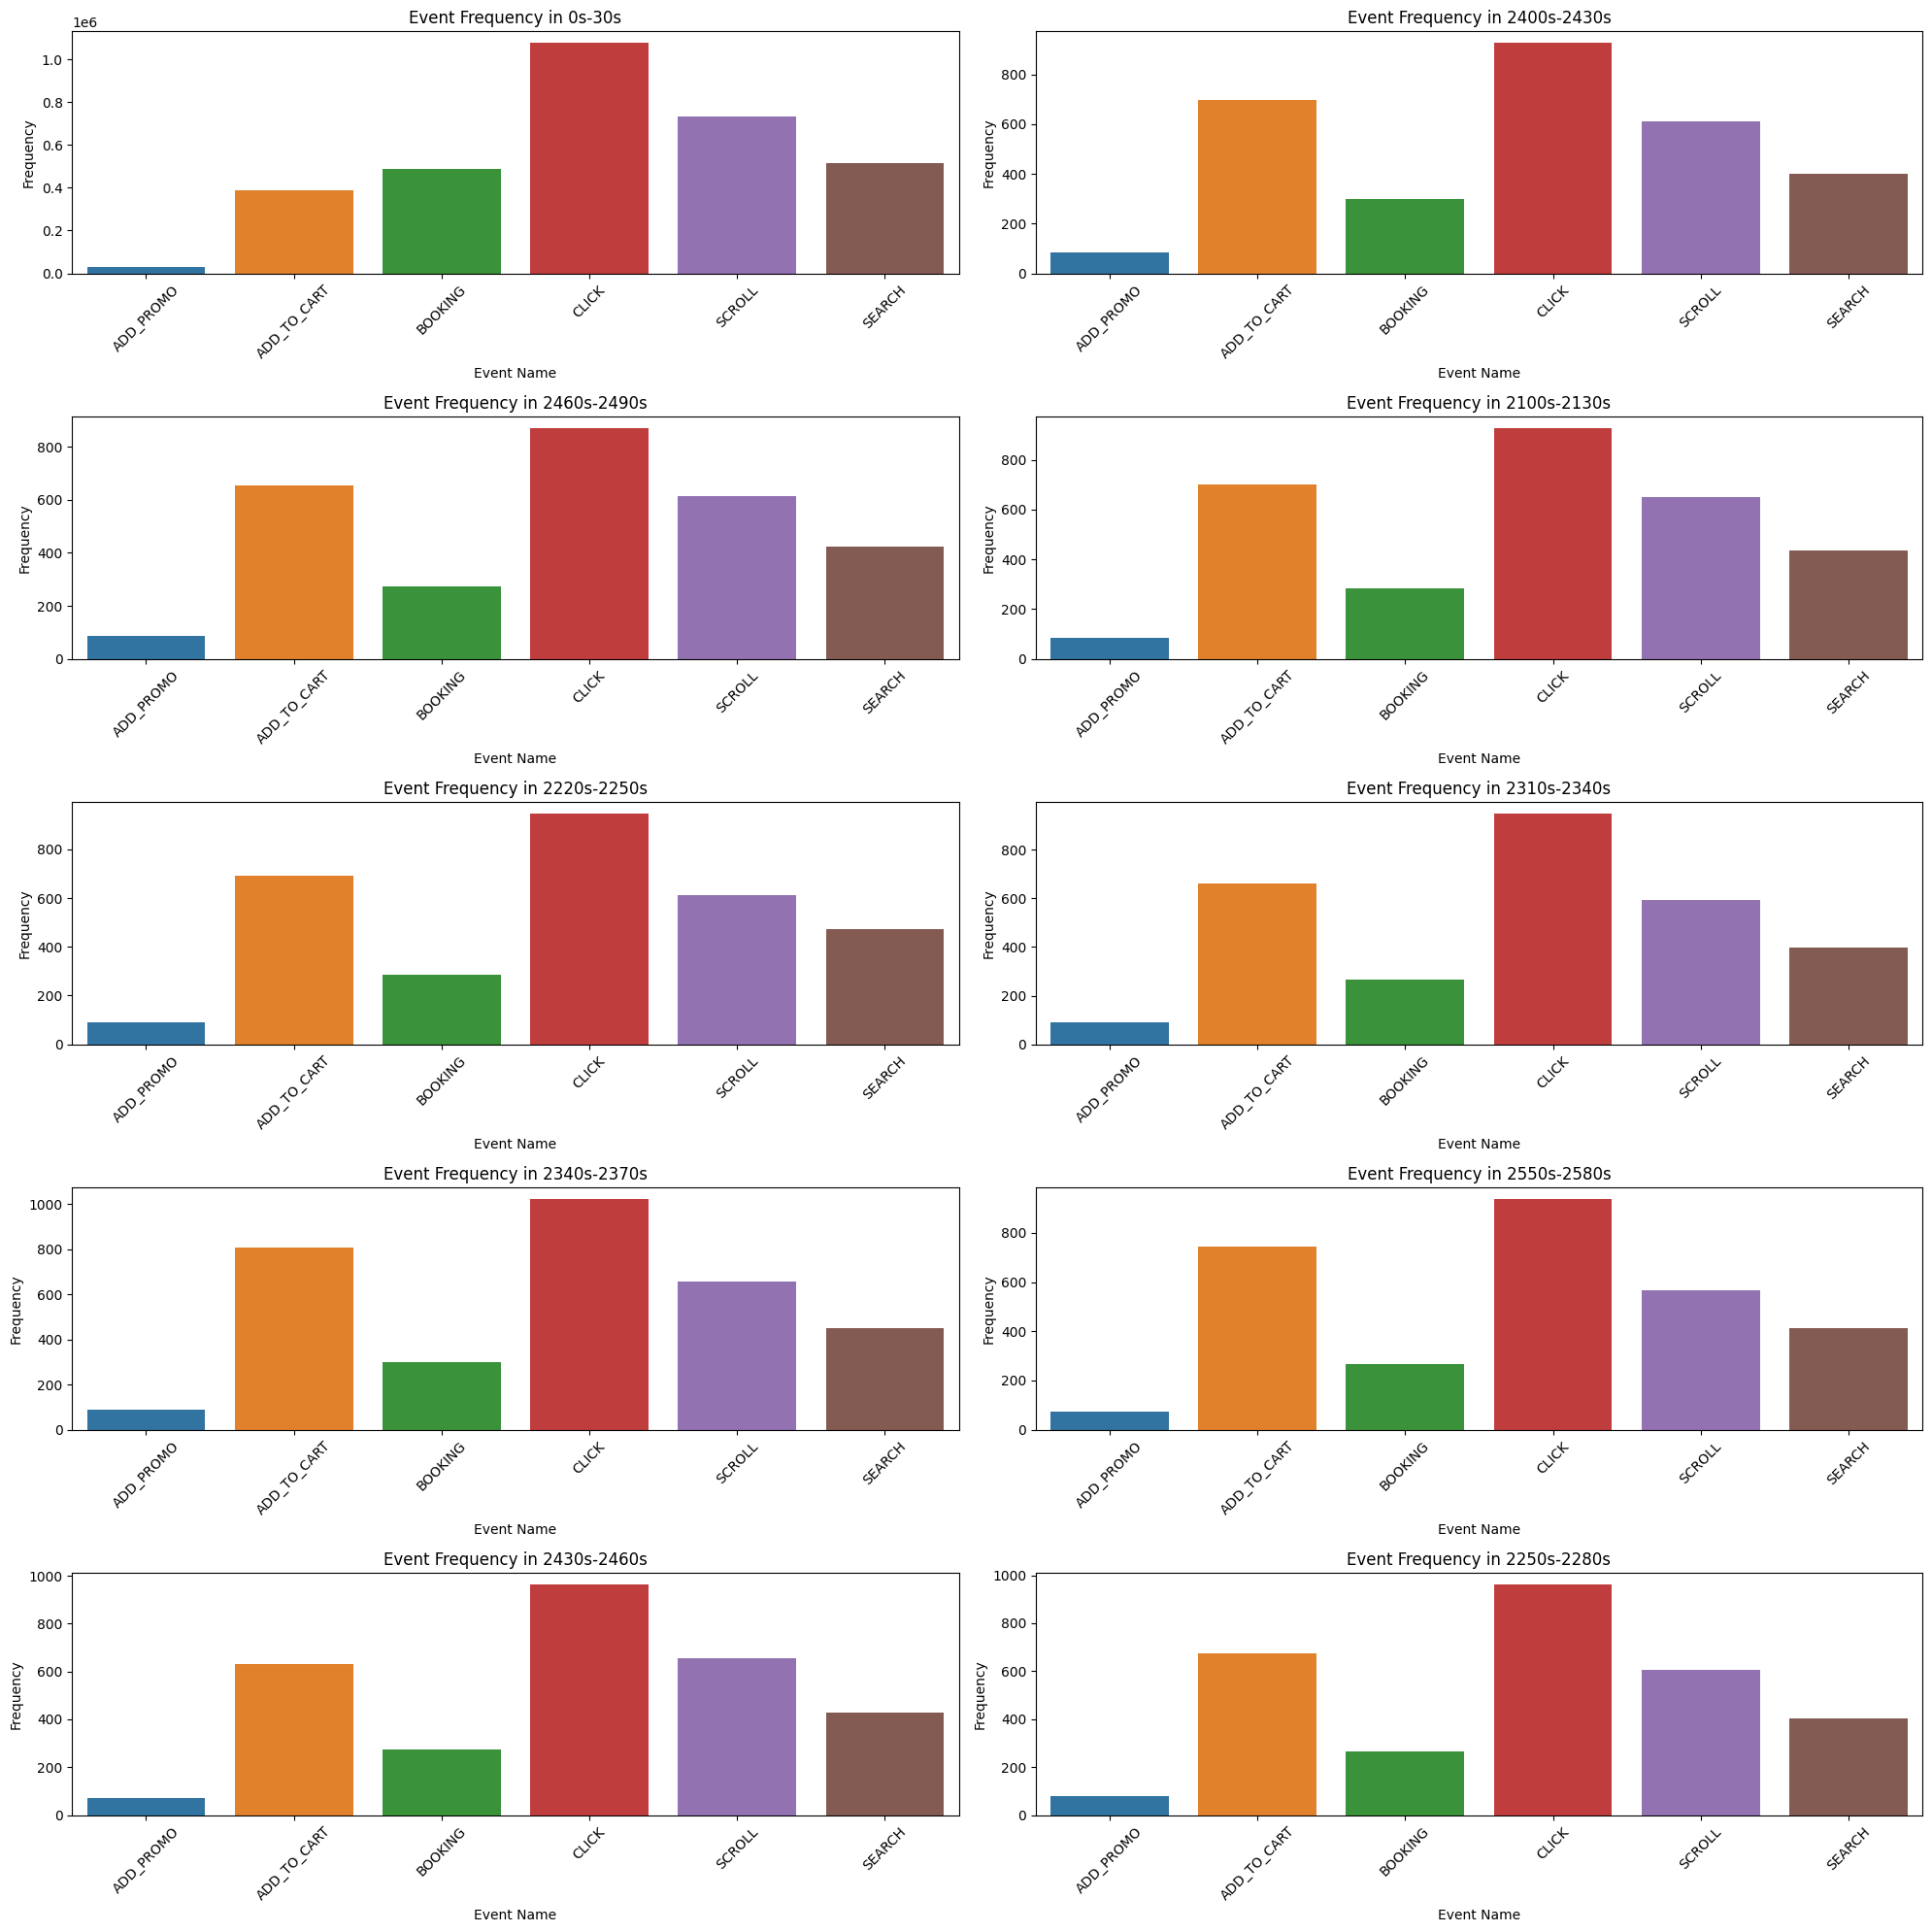

In [105]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # 5행 2열의 subplot 생성

# 상위 10개 체류 그룹 별로 subplot 생성
for idx, group in enumerate(top_conversion_groups):
    ax = axes[idx // 2, idx % 2]
    df_group = event_freq_top_conversion[event_freq_top_conversion['duration_group'] == group]
    sns.barplot(x='event_name', y='count', data=df_group, ax=ax)
    ax.set_title(f'Event Frequency in {group}')
    ax.set_xlabel('Event Name')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# 빈 subplot이 있을 경우 이를 제거
if len(top_conversion_groups) < 10:
    for idx in range(len(top_conversion_groups), 10):
        fig.delaxes(axes.flatten()[idx])

plt.tight_layout()  # 그래프 간격 조절
plt.show()


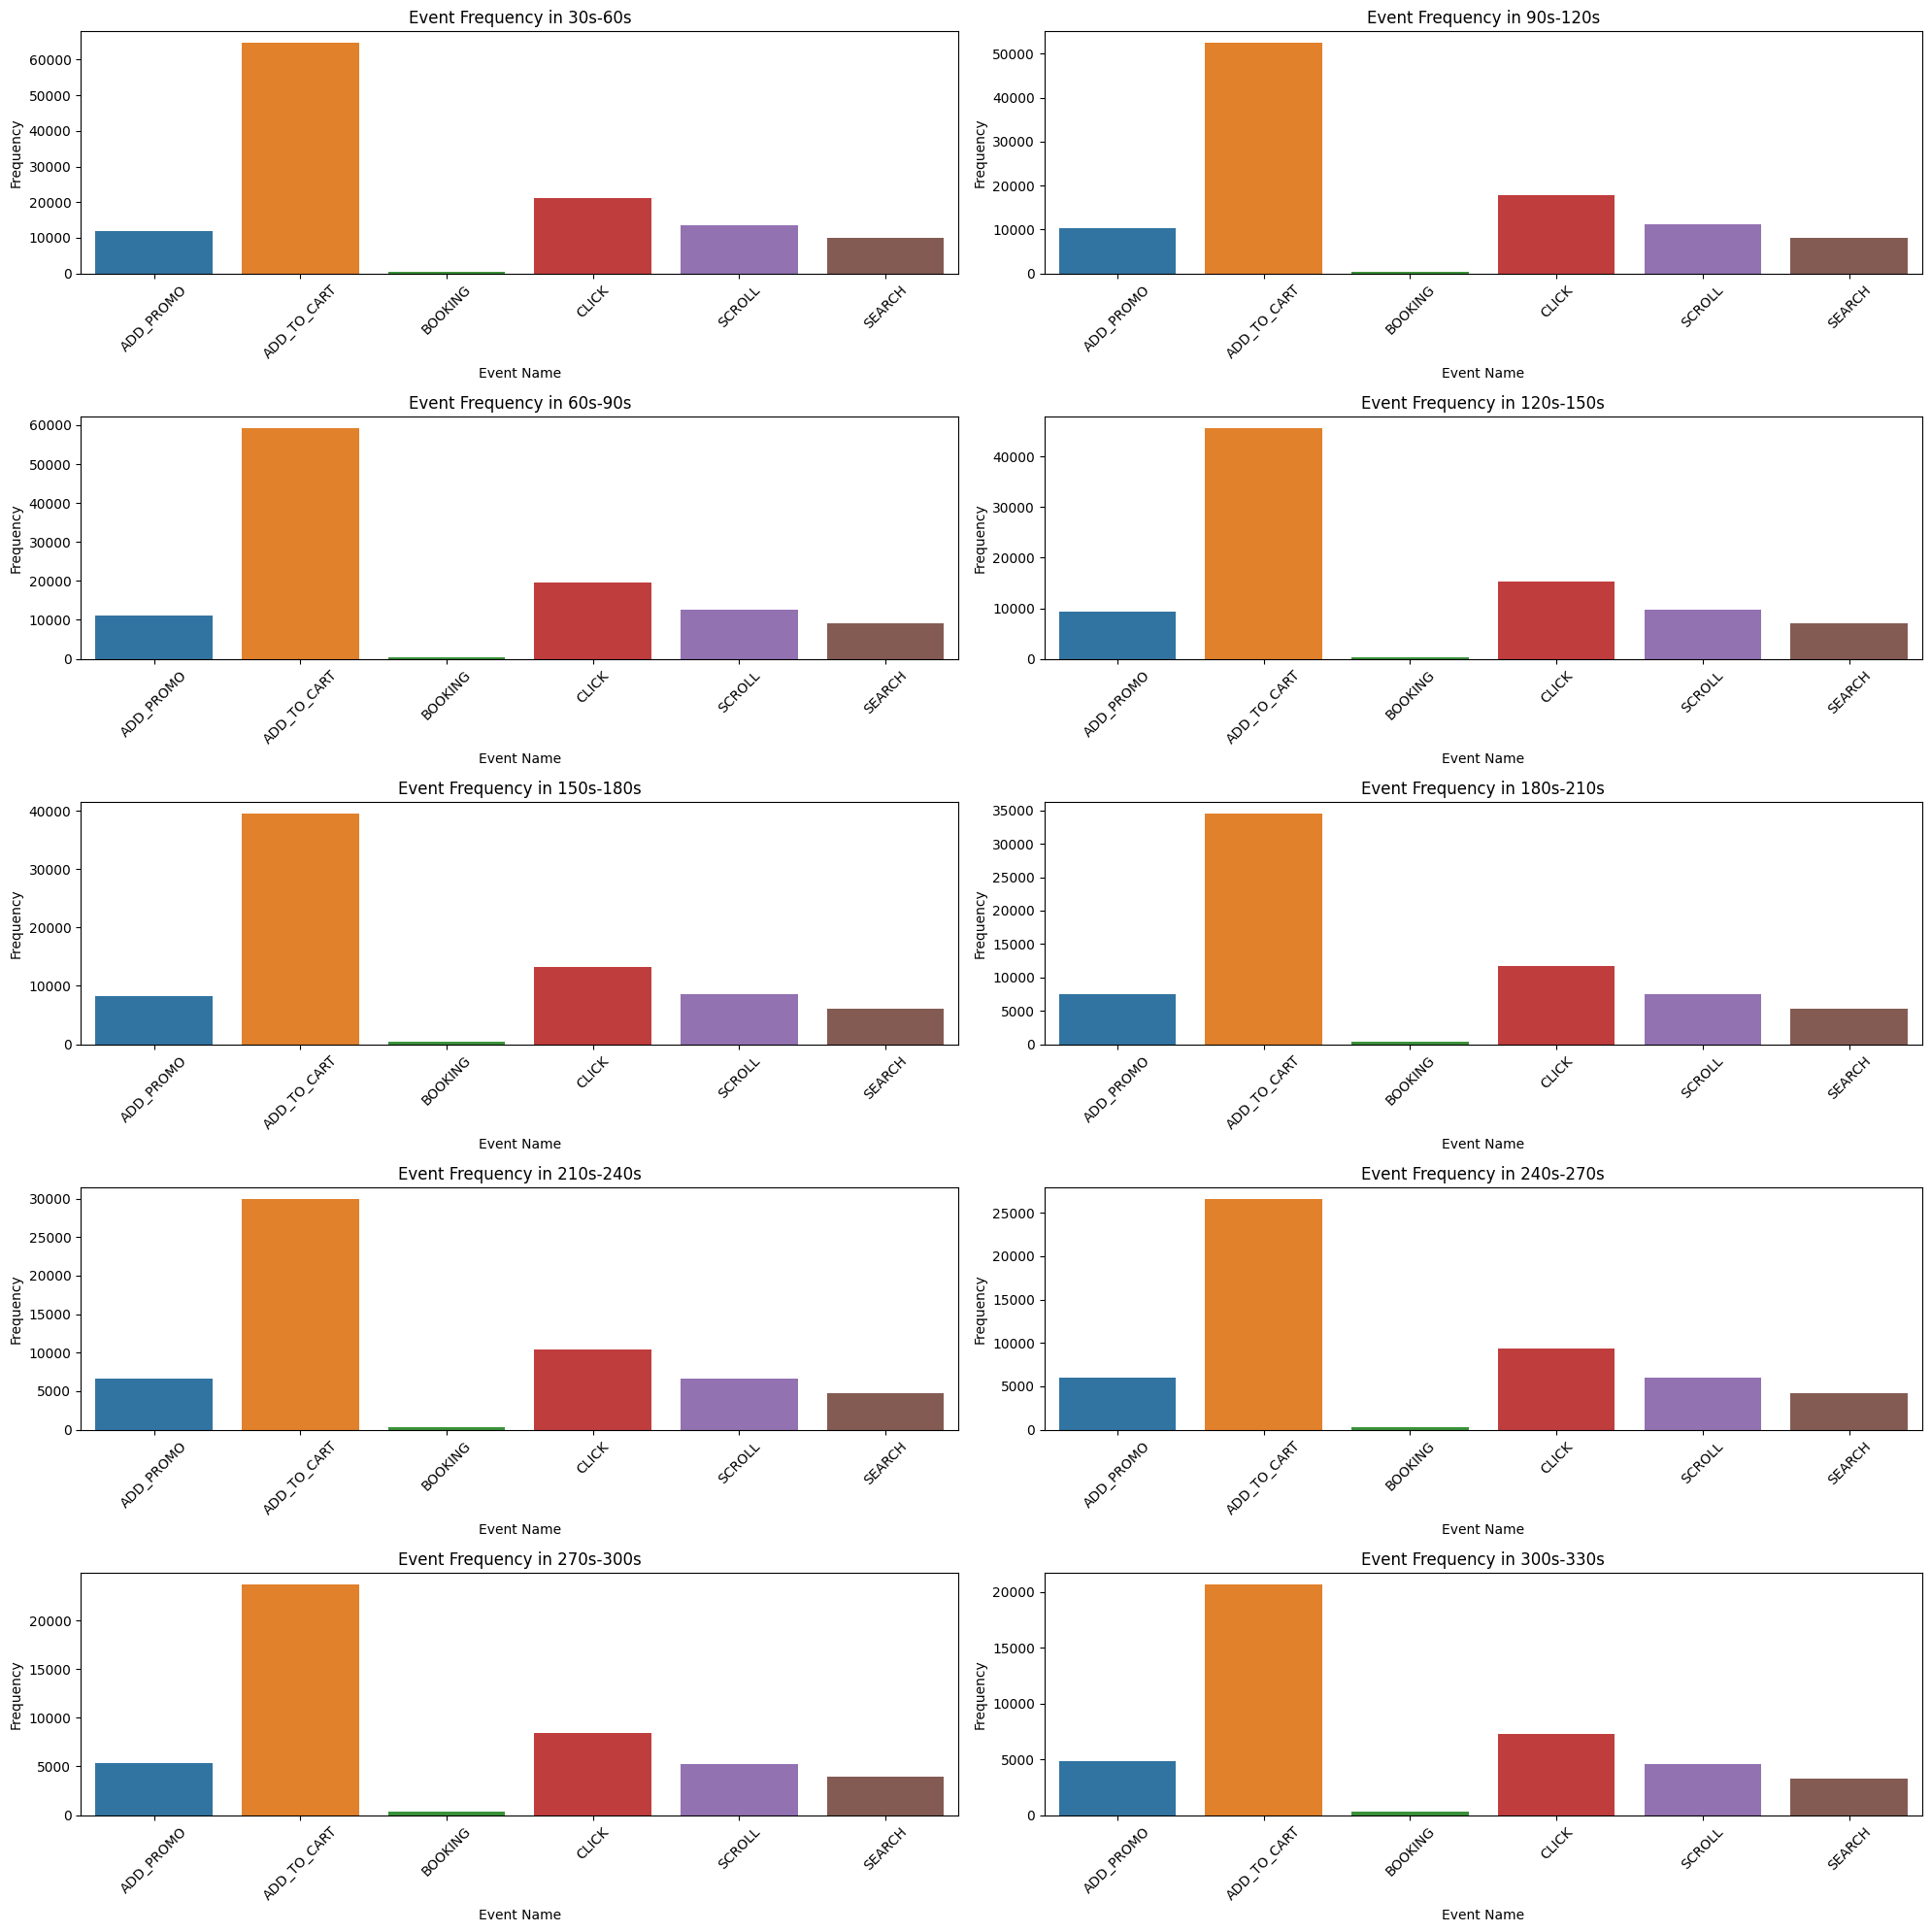

In [106]:
# 구매 전환율 하위 10개 체류 그룹
bottom_conversion_groups = data_filtered.sort_values('is_purchase').head(10)['duration_group'].tolist()

# 각 체류 그룹별 이벤트 빈도 계산
event_freq_bottom_conversion = df_new[df_new['duration_group'].isin(bottom_conversion_groups)].groupby(['duration_group', 'event_name']).size().reset_index(name='count')

fig, axes = plt.subplots(5, 2, figsize=(20, 20))  # 5행 2열의 subplot 생성

# 하위 10개 체류 그룹 별로 subplot 생성
for idx, group in enumerate(bottom_conversion_groups):
    ax = axes[idx // 2, idx % 2]
    df_group = event_freq_bottom_conversion[event_freq_bottom_conversion['duration_group'] == group]
    sns.barplot(x='event_name', y='count', data=df_group, ax=ax)
    ax.set_title(f'Event Frequency in {group}')
    ax.set_xlabel('Event Name')
    ax.set_ylabel('Frequency')
    ax.tick_params(axis='x', rotation=45)

# 빈 subplot이 있을 경우 이를 제거
if len(bottom_conversion_groups) < 10:
    for idx in range(len(bottom_conversion_groups), 10):
        fig.delaxes(axes.flatten()[idx])

plt.tight_layout()  # 그래프 간격 조절
plt.show()


In [108]:
# 상위 10개 그룹의 이벤트 빈도
print("Top 10 Conversion Groups Event Frequencies:")
for group in top_conversion_groups:
    print(f"\n--- Group: {group} --- Conversion Rate: {conversion_rate[group]:.2f}%")
    group_event_freq = event_freq_top_conversion[event_freq_top_conversion['duration_group'] == group]
    group_event_freq_sorted = group_event_freq.sort_values('count', ascending=False)
    print(group_event_freq_sorted)

# 하위 10개 그룹의 이벤트 빈도 (0s ~ 4530s)
print("\n\nBottom 10 Conversion Groups Event Frequencies:")
for group in bottom_conversion_groups:
    print(f"\n--- Group: {group} --- Conversion Rate: {conversion_rate[group]:.2f}%")
    group_event_freq = event_freq_bottom_conversion[event_freq_bottom_conversion['duration_group'] == group]
    group_event_freq_sorted = group_event_freq.sort_values('count', ascending=False)
    print(group_event_freq_sorted)


Top 10 Conversion Groups Event Frequencies:

--- Group: 0s-30s --- Conversion Rate: 14.41%
  duration_group   event_name    count
3         0s-30s        CLICK  1076212
4         0s-30s       SCROLL   731631
5         0s-30s       SEARCH   513095
2         0s-30s      BOOKING   485762
1         0s-30s  ADD_TO_CART   387961
0         0s-30s    ADD_PROMO    31127

--- Group: 2400s-2430s --- Conversion Rate: 9.48%
    duration_group   event_name  count
483    2400s-2430s        CLICK    926
481    2400s-2430s  ADD_TO_CART    695
484    2400s-2430s       SCROLL    610
485    2400s-2430s       SEARCH    400
482    2400s-2430s      BOOKING    299
480    2400s-2430s    ADD_PROMO     86

--- Group: 2460s-2490s --- Conversion Rate: 9.03%
    duration_group   event_name  count
495    2460s-2490s        CLICK    870
493    2460s-2490s  ADD_TO_CART    656
496    2460s-2490s       SCROLL    615
497    2460s-2490s       SEARCH    423
494    2460s-2490s      BOOKING    273
492    2460s-2490s    ADD_P

In [109]:
# 상위 10개 그룹의 이벤트 빈도(전체 데이터)
print("Top 10 Conversion Groups Event Frequencies:")
for group in top_conversion_groups:
    print(f"\n--- Group: {group} --- Conversion Rate: {conversion_rate[group]:.2f}%")
    group_event_freq = event_freq_top_conversion[event_freq_top_conversion['duration_group'] == group]
    group_event_freq_sorted = group_event_freq.sort_values('count', ascending=False)
    print(group_event_freq_sorted[['event_name', 'count']])

# 하위 10개 그룹의 이벤트 빈도
print("\n\nBottom 10 Conversion Groups Event Frequencies:")
for group in bottom_conversion_groups:
    print(f"\n--- Group: {group} --- Conversion Rate: {conversion_rate[group]:.2f}%")
    group_event_freq = event_freq_bottom_conversion[event_freq_bottom_conversion['duration_group'] == group]
    group_event_freq_sorted = group_event_freq.sort_values('count', ascending=False)
    print(group_event_freq_sorted[['event_name', 'count']])


Top 10 Conversion Groups Event Frequencies:

--- Group: 0s-30s --- Conversion Rate: 14.41%
    event_name    count
3        CLICK  1076212
4       SCROLL   731631
5       SEARCH   513095
2      BOOKING   485762
1  ADD_TO_CART   387961
0    ADD_PROMO    31127

--- Group: 2400s-2430s --- Conversion Rate: 9.48%
      event_name  count
483        CLICK    926
481  ADD_TO_CART    695
484       SCROLL    610
485       SEARCH    400
482      BOOKING    299
480    ADD_PROMO     86

--- Group: 2460s-2490s --- Conversion Rate: 9.03%
      event_name  count
495        CLICK    870
493  ADD_TO_CART    656
496       SCROLL    615
497       SEARCH    423
494      BOOKING    273
492    ADD_PROMO     88

--- Group: 2100s-2130s --- Conversion Rate: 8.84%
      event_name  count
423        CLICK    927
421  ADD_TO_CART    700
424       SCROLL    652
425       SEARCH    434
422      BOOKING    282
420    ADD_PROMO     83

--- Group: 2220s-2250s --- Conversion Rate: 8.66%
      event_name  count
447      

In [110]:
# 하위 10개 그룹의 이벤트 빈도
print("\n\nBottom 10 Conversion Groups Event Frequencies:")
for group in bottom_conversion_groups2:
    print(f"\n--- Group: {group} --- Conversion Rate: {conversion_rate[group]:.2f}%")
    group_event_freq2 = event_freq_bottom_conversion2[event_freq_bottom_conversion2['duration_group'] == group]
    group_event_freq_sorted2 = group_event_freq2.sort_values('count', ascending=False)
    print(group_event_freq_sorted2[['event_name', 'count']])



Bottom 10 Conversion Groups Event Frequencies:

--- Group: 21510s-21540s --- Conversion Rate: 0.00%
       event_name  count
4305        CLICK     56
4303  ADD_TO_CART     52
4306       SCROLL     30
4307       SEARCH     30
4302    ADD_PROMO      6
4304      BOOKING      0

--- Group: 20190s-20220s --- Conversion Rate: 0.33%
       event_name  count
4041        CLICK    122
4042       SCROLL     75
4043       SEARCH     54
4039  ADD_TO_CART     44
4038    ADD_PROMO     11
4040      BOOKING      1

--- Group: 30s-60s --- Conversion Rate: 0.35%
     event_name  count
7   ADD_TO_CART  64707
9         CLICK  21115
10       SCROLL  13618
6     ADD_PROMO  11932
11       SEARCH   9991
8       BOOKING    449

--- Group: 90s-120s --- Conversion Rate: 0.35%
     event_name  count
19  ADD_TO_CART  52450
21        CLICK  17771
22       SCROLL  11103
18    ADD_PROMO  10314
23       SEARCH   8190
20      BOOKING    369

--- Group: 60s-90s --- Conversion Rate: 0.36%
     event_name  count
13  ADD_

In [111]:
# 상위 10개 그룹의 이벤트 빈도 합계
top_group_event_freq = event_freq_top_conversion.groupby('event_name')['count'].sum()

# 상위 10개 그룹의 구매 전환율 평균
top_group_conversion_rate = np.mean([conversion_rate[group] for group in top_conversion_groups])

# 결과 출력
print("--- Top groups ---")
print("Average Conversion Rate: {:.2f}%".format(top_group_conversion_rate))
print("Event Frequencies:\n", top_group_event_freq.sort_values(ascending=False))


# 하위 10개 그룹의 이벤트 빈도 합계
bottom_group_event_freq = event_freq_bottom_conversion.groupby('event_name')['count'].sum()

# 하위 10개 그룹의 구매 전환율 평균
bottom_group_conversion_rate = np.mean([conversion_rate[group] for group in bottom_conversion_groups])

# 결과 출력
print("\n--- Bottom groups ---")
print("Average Conversion Rate: {:.2f}%".format(bottom_group_conversion_rate))
print("Event Frequencies:\n", bottom_group_event_freq.sort_values(ascending=False))



--- Top groups ---
Average Conversion Rate: 9.32%
Event Frequencies:
 event_name
CLICK          1084711
SCROLL          737193
SEARCH          516917
BOOKING         488268
ADD_TO_CART     394224
ADD_PROMO        31877
Name: count, dtype: int64

--- Bottom groups ---
Average Conversion Rate: 0.50%
Event Frequencies:
 event_name
ADD_TO_CART    396819
CLICK          134467
SCROLL          85459
ADD_PROMO       81311
SEARCH          62111
BOOKING          3657
Name: count, dtype: int64


In [112]:
# 상위 10개 그룹의 이벤트 빈도
print("Top 10 Conversion Groups Average Event Frequencies:")
for group in top_conversion_groups:
    print(f"\n--- Group: {group} --- Conversion Rate: {conversion_rate[group]:.2f}%")
    group_event_freq = df_new[df_new['duration_group'] == group].groupby('event_name')['new_session_id'].count() / df_new[df_new['duration_group'] == group]['new_session_id'].nunique()
    group_event_freq_sorted = group_event_freq.sort_values(ascending=False)
    avg_event_per_session = group_event_freq.sum()
    print(f"Average events per session: {avg_event_per_session:.2f}")
    print(group_event_freq_sorted)

# 하위 10개 그룹의 이벤트 빈도
print("\n\nBottom 10 Conversion Groups Average Event Frequencies:")
for group in bottom_conversion_groups:
    print(f"\n--- Group: {group} --- Conversion Rate: {conversion_rate[group]:.2f}%")
    group_event_freq = df_new[df_new['duration_group'] == group].groupby('event_name')['new_session_id'].count() / df_new[df_new['duration_group'] == group]['new_session_id'].nunique()
    group_event_freq_sorted = group_event_freq.sort_values(ascending=False)
    avg_event_per_session = group_event_freq.sum()
    print(f"Average events per session: {avg_event_per_session:.2f}")
    print(group_event_freq_sorted)



Top 10 Conversion Groups Average Event Frequencies:

--- Group: 0s-30s --- Conversion Rate: 14.41%
Average events per session: 1.02
event_name
CLICK          0.339536
SCROLL         0.230823
SEARCH         0.161877
BOOKING        0.153254
ADD_TO_CART    0.122398
ADD_PROMO      0.009820
Name: new_session_id, dtype: float64

--- Group: 2400s-2430s --- Conversion Rate: 9.48%
Average events per session: 7.23
event_name
CLICK          2.220624
ADD_TO_CART    1.666667
SCROLL         1.462830
SEARCH         0.959233
BOOKING        0.717026
ADD_PROMO      0.206235
Name: new_session_id, dtype: float64

--- Group: 2460s-2490s --- Conversion Rate: 9.03%
Average events per session: 7.03
event_name
CLICK          2.091346
ADD_TO_CART    1.576923
SCROLL         1.478365
SEARCH         1.016827
BOOKING        0.656250
ADD_PROMO      0.211538
Name: new_session_id, dtype: float64

--- Group: 2100s-2130s --- Conversion Rate: 8.84%
Average events per session: 7.14
event_name
CLICK          2.150812
ADD_T

In [113]:
def get_average_duration(groups):
    avg_durations = []
    for group in groups:
        start, end = group.split('-')
        start = int(start.replace('s', ''))
        end = int(end.replace('s', ''))
        avg_duration = (start + end) / 2
        avg_durations.append(avg_duration)
    return np.mean(avg_durations)

top_avg_duration = get_average_duration(top_conversion_groups)
bottom_avg_duration = get_average_duration(bottom_conversion_groups)

print(f"Average duration for top 10 conversion groups: {top_avg_duration}s")
print(f"Average duration for bottom 10 conversion groups: {bottom_avg_duration}s")


Average duration for top 10 conversion groups: 2121.0s
Average duration for bottom 10 conversion groups: 180.0s


In [115]:
df_session_pro[df_session_pro['duration_time'] == '0 days 00:00:00']['event_name'].value_counts()

event_name
CLICK          1053399
SCROLL          716921
SEARCH          502300
BOOKING         485171
ADD_TO_CART     318832
ADD_PROMO        18835
Name: count, dtype: int64

In [120]:
# 상위 10개 체류시간 그룹에서의 제품 카테고리 분석
print("Top 10 duration groups: product category frequency")
for group in top_conversion_groups:
    print(f"\n--- Group: {group} ---")
    category_freq = df_session_pro[df_session_pro['duration_group'] == group]['masterCategory'].value_counts()
    print(category_freq)

# 하위 10개 체류시간 그룹에서의 제품 카테고리 분석
print("\nBottom 10 duration groups: product category frequency")
for group in bottom_conversion_groups2:
    print(f"\n--- Group: {group} ---")
    category_freq = df_session_pro[df_session_pro['duration_group'] == group]['masterCategory'].value_counts()
    print(category_freq)


Top 10 duration groups: product category frequency

--- Group: 0s-30s ---
masterCategory
Footwear          193894
Accessories       104978
Apparel            80582
Personal Care       7959
Free Items           366
Sporting Goods        86
Home                   1
Name: count, dtype: int64

--- Group: 2400s-2430s ---
masterCategory
Footwear         271
Apparel          222
Accessories      179
Personal Care     21
Free Items         1
Name: count, dtype: int64

--- Group: 2460s-2490s ---
masterCategory
Footwear         275
Apparel          195
Accessories      169
Personal Care     16
Free Items         1
Name: count, dtype: int64

--- Group: 2100s-2130s ---
masterCategory
Footwear         290
Apparel          214
Accessories      177
Personal Care     17
Name: count, dtype: int64

--- Group: 2220s-2250s ---
masterCategory
Footwear         281
Apparel          198
Accessories      182
Personal Care     23
Free Items         7
Name: count, dtype: int64

--- Group: 2310s-2340s ---
masterC

In [121]:
# 상위 그룹과 하위 그룹의 제품 카테고리 빈도 합계
top_group_category_freq = pd.Series(dtype='int64')
bottom_group_category_freq = pd.Series(dtype='int64')

for group in top_conversion_groups:
    category_freq = df_session_pro[df_session_pro['duration_group'] == group]['masterCategory'].value_counts()
    top_group_category_freq = top_group_category_freq.add(category_freq, fill_value=0)

for group in bottom_conversion_groups2:
    category_freq = df_session_pro[df_session_pro['duration_group'] == group]['masterCategory'].value_counts()
    bottom_group_category_freq = bottom_group_category_freq.add(category_freq, fill_value=0)

# 결과 출력
print("--- Top groups ---")
print("Product Category Frequencies:\n", top_group_category_freq.sort_values(ascending=False))

print("\n--- Bottom groups ---")
print("Product Category Frequencies:\n", bottom_group_category_freq.sort_values(ascending=False))


--- Top groups ---
Product Category Frequencies:
 masterCategory
Footwear          196418.0
Accessories       106618.0
Apparel            82496.0
Personal Care       8126.0
Free Items           378.0
Sporting Goods        88.0
Home                   1.0
dtype: float64

--- Bottom groups ---
Product Category Frequencies:
 masterCategory
Apparel           98358.0
Accessories       56788.0
Footwear          55268.0
Personal Care     11102.0
Free Items          497.0
Sporting Goods      108.0
Home                  3.0
dtype: float64


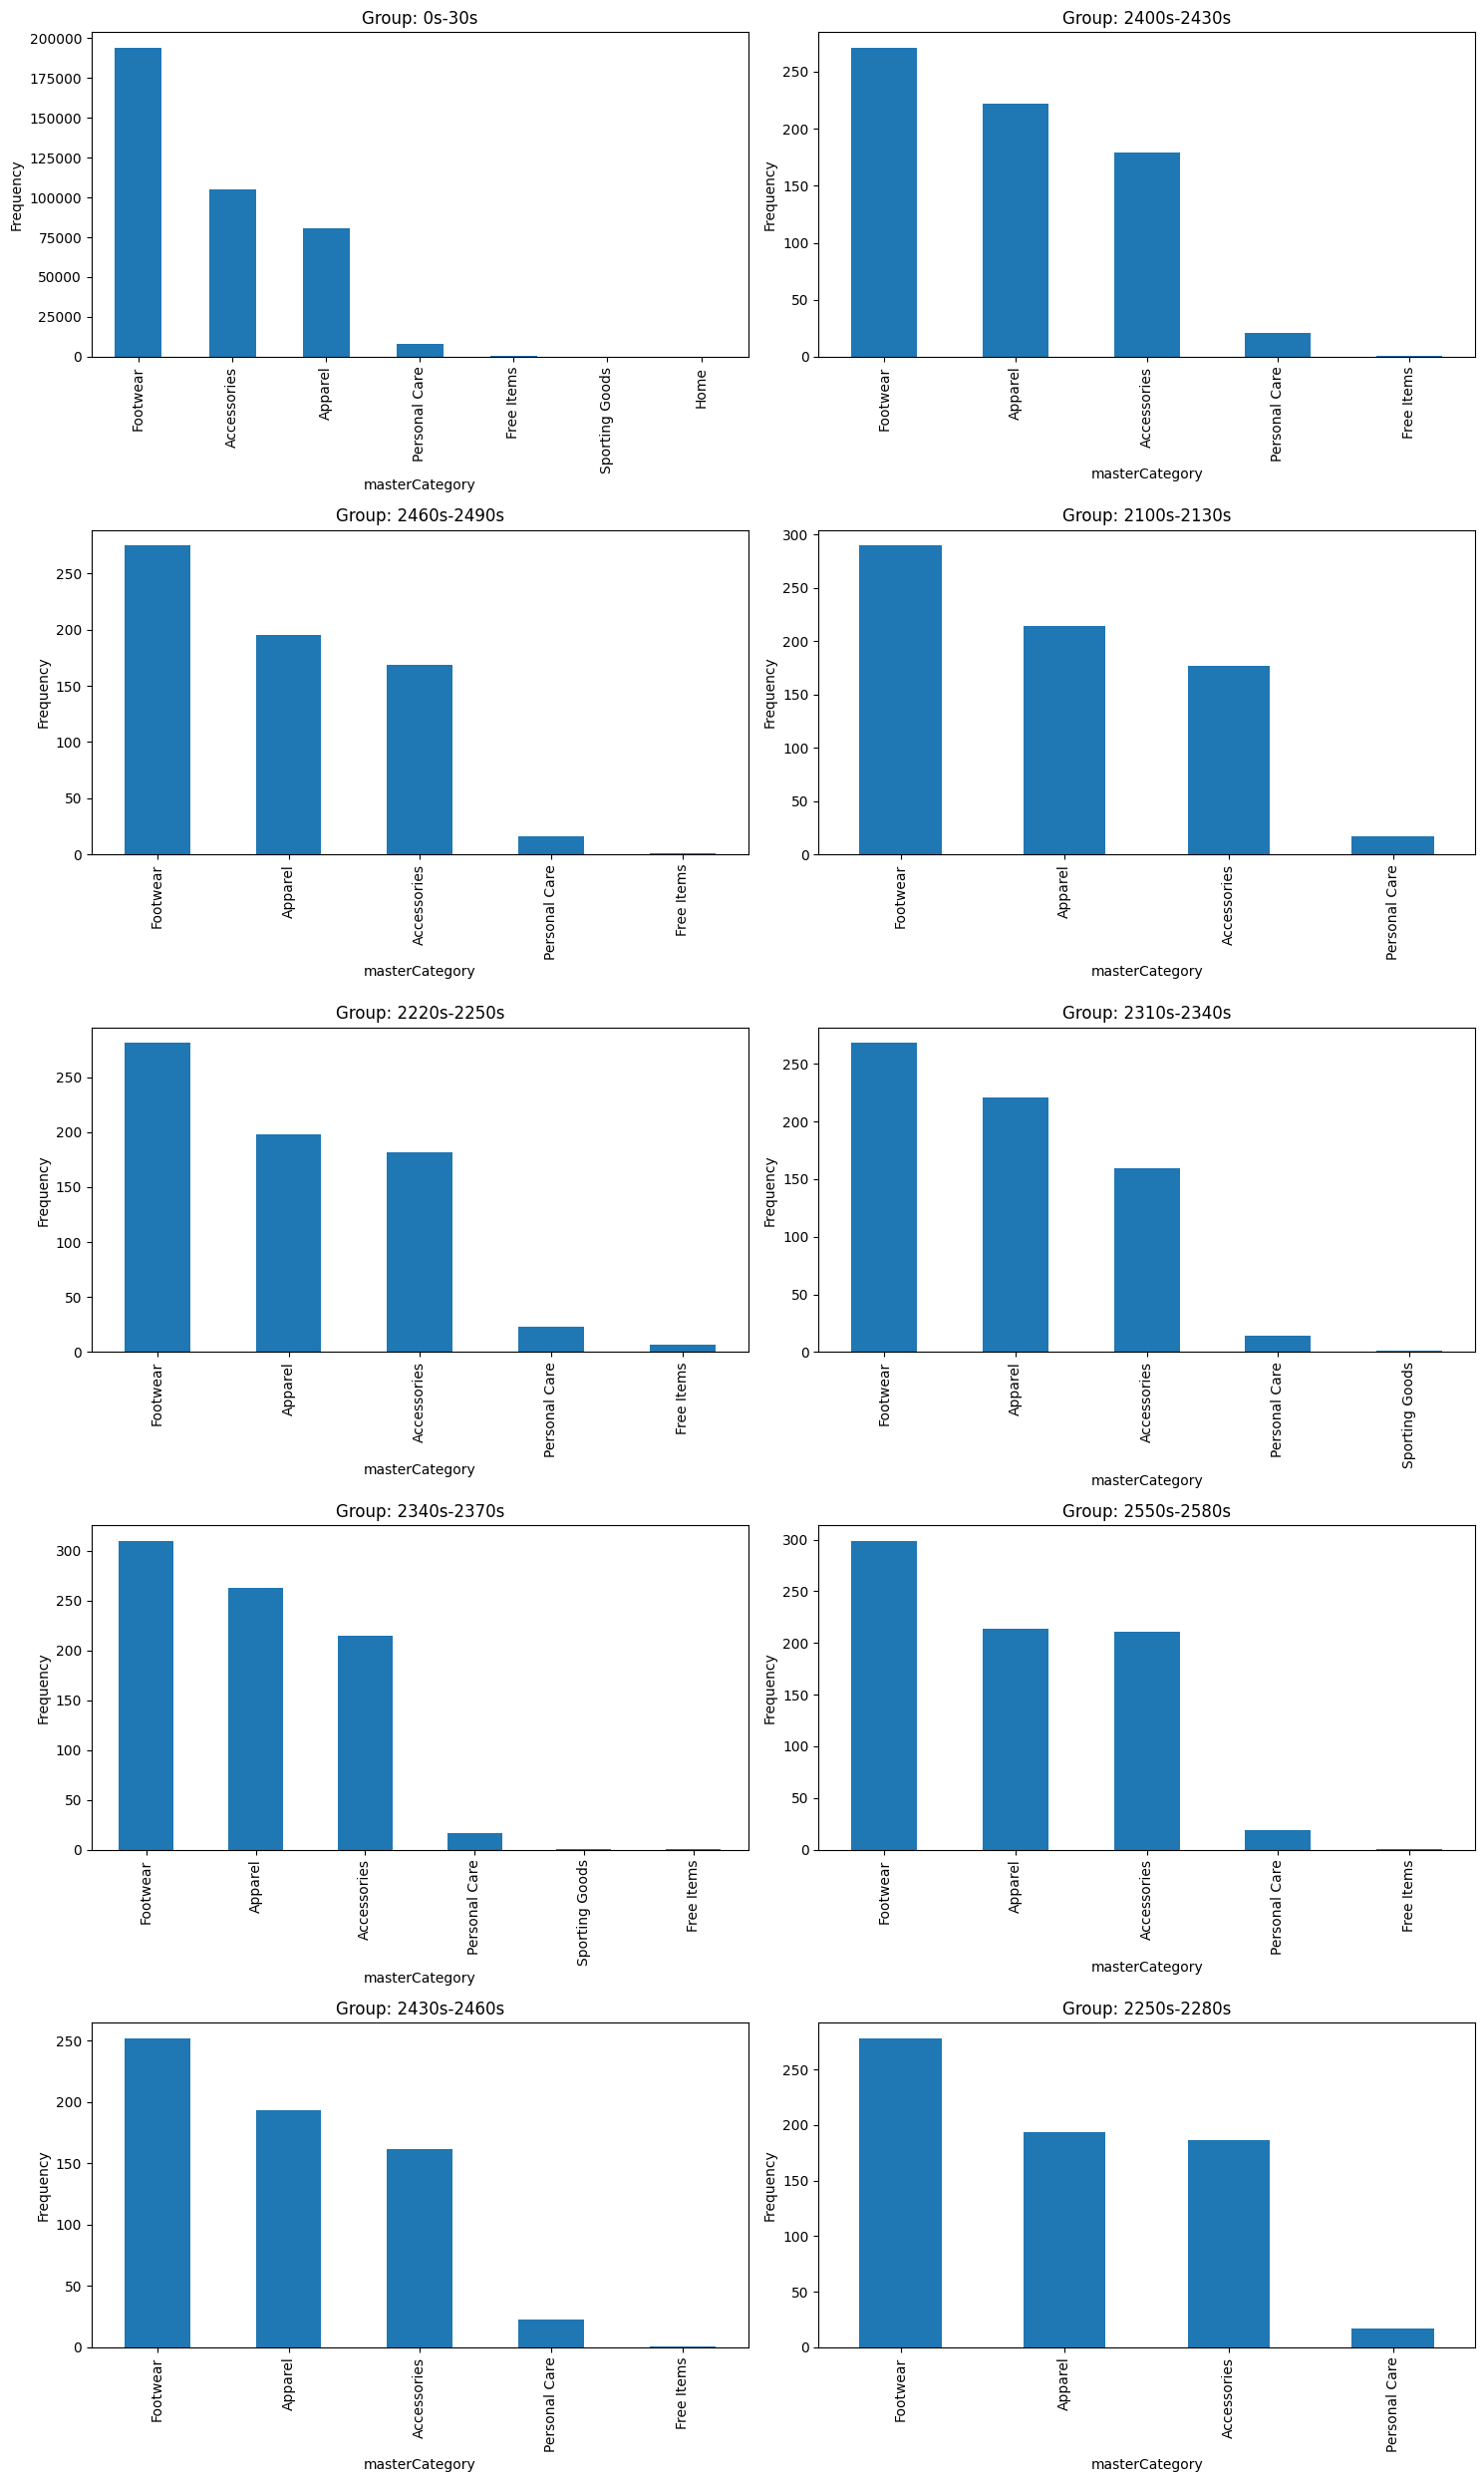

In [118]:


fig, axs = plt.subplots(5, 2, figsize=(15, 25))

for idx, group in enumerate(top_conversion_groups):
    ax = axs[idx//2, idx%2]
    category_freq = df_session_pro[df_session_pro['duration_group'] == group]['masterCategory'].value_counts()
    category_freq.plot(kind='bar', ax=ax)
    ax.set_title(f"Group: {group}")
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [122]:
# 상위 10개 체류시간 그룹에서의 검색 키워드 분석
print("Top 10 duration groups: product category frequency")
for group in top_conversion_groups:
    print(f"\n--- Group: {group} ---")
    search_keywords_freq = df_session_pro[df_session_pro['duration_group'] == group]['search_keywords'].value_counts()
    print(search_keywords_freq)

# 하위 10개 체류시간 그룹에서의 검색 키워드 분석
print("\nBottom 10 duration groups: product category frequency")
for group in bottom_conversion_groups:
    print(f"\n--- Group: {group} ---")
    search_keywords_freq = df_session_pro[df_session_pro['duration_group'] == group]['search_keywords'].value_counts()
    print(search_keywords_freq)

Top 10 duration groups: product category frequency

--- Group: 0s-30s ---
search_keywords
파티 드레스     140855
중고          86282
여성 가방       54502
티셔츠         50731
옷           36815
셔츠          36712
나이키 신발      21821
직장용 가방      16356
긴 바지        12294
신발          12294
중고 상품       12066
아디다스 신발     10820
바지           6907
샌들           5417
시계           4266
모자           2872
잠옷           1355
원피스           730
Name: count, dtype: int64

--- Group: 2400s-2430s ---
search_keywords
파티 드레스     109
중고          68
여성 가방       49
셔츠          37
티셔츠         33
옷           21
나이키 신발      21
직장용 가방      12
긴 바지        12
중고 상품       10
아디다스 신발      8
신발           6
바지           4
샌들           4
모자           4
잠옷           1
시계           1
Name: count, dtype: int64

--- Group: 2460s-2490s ---
search_keywords
파티 드레스     129
중고          62
티셔츠         46
여성 가방       40
셔츠          26
옷           25
나이키 신발      19
직장용 가방      18
아디다스 신발     16
긴 바지        13
중고 상품        9
신발           7
바지         

In [126]:
# drop_outliter_events.to_csv("drop_outliter_events.csv", index=False)